### Inicio de proyecto.Vamos a hacer un analisis exploratorio de los datos aportados y procesos de transformacion si fuera necesario.

Importamos pandas,numpy wordcloud y matplotlib

In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

### COURSERA COURSES

In [68]:
coursera_courses = pd.read_csv("Coursera_courses.csv")

In [69]:
coursera_courses

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training
...,...,...,...,...
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution


In [70]:
coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [71]:
coursera_courses.duplicated().sum()

0

Para comenzar notamos que el dataframe esta completoy no tiene registros repetidos.

### Name

Nombre del curso.Variable cualitativa nominal.

In [72]:
coursera_courses.duplicated(subset="name").sum()

1

In [73]:
coursera_courses[coursera_courses.duplicated(subset="name")]

,name,institution,course_url,course_id
54,Introduction to Psychology,University of Toronto,https://www.coursera.org/learn/introduction-psych,introduction-psych


In [74]:
coursera_courses[coursera_courses["name"] == "Introduction to Psychology"]

,name,institution,course_url,course_id
6,Introduction to Psychology,Yale University,https://www.coursera.org/learn/introduction-ps...,introduction-psychology
54,Introduction to Psychology,University of Toronto,https://www.coursera.org/learn/introduction-psych,introduction-psych


Vemos que el unico curso con nombre repetido pertenece a distintos instituos.

In [75]:
#Verificamos la calidad de los datos
for i,elemento in enumerate(coursera_courses['name']):
    if elemento.isdigit() == True:
        print(i,elemento)

Buscamos generar una nube de palabras para ver la frecuencia

In [76]:
texto = ''
for row in coursera_courses['name']:
    texto += row + ' '

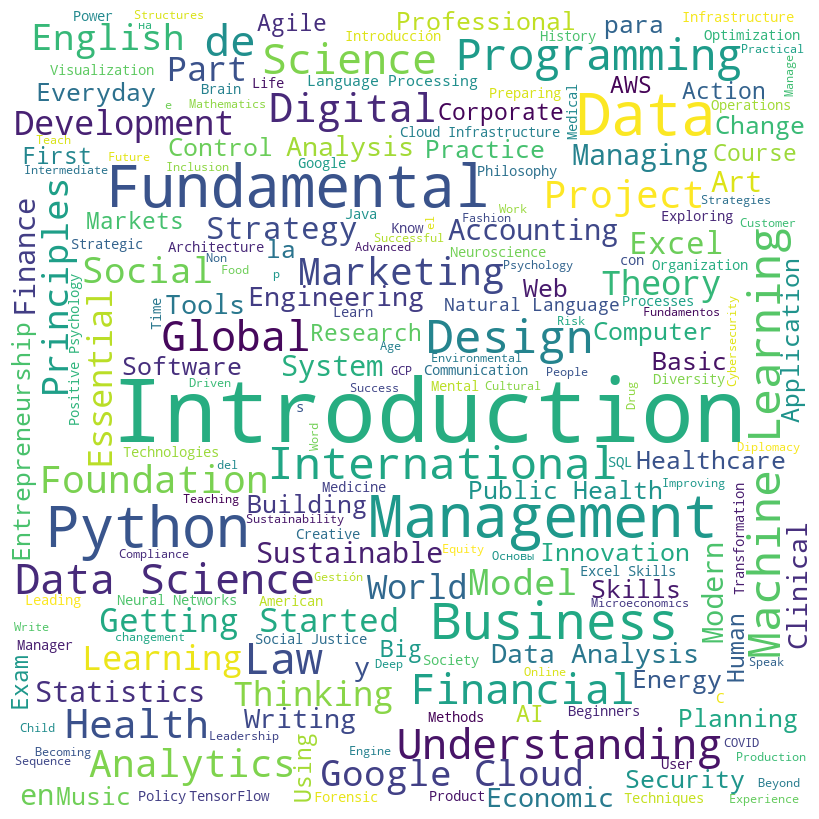

In [77]:

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(texto)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Notamos rapidamente que introduction es la palabra con mayor frecuencia,por lo que podemos considerar que en el conjunto de cursos este es el nivel mas ofrecido.Tambien vemos que hay dos ramas de cursos managment,marketing y relacionados como estrategia,negocios,etc y otra rama enfocada al manejo de sistemas,programacion con un foco importante en datos.

### Institution

Instituciones que imparten los cursos.Variable cualitativa nominal.

In [13]:
#Verificamos la calidad de los datos
for i,elemento in enumerate(coursera_courses['institution']):
    if elemento.isdigit() == True:
        print(i,elemento)

In [14]:

cantidad_instituos = coursera_courses['institution'].unique().shape[0]
media = coursera_courses['institution'].value_counts().mean()
desviacion_estandar = coursera_courses['institution'].value_counts().std()
cantidad_instituos,media,desviacion_estandar


(134, 4.649253731343284, 6.218160962429746)

El total de cursos que se imparten provienen de 134 instituciones distintas con una media de 4.64 cursos por instituo.Queremos ver cuales son los 10 instituos con mayor cantidad de cursos y que tan significativa es la suma de estas cantidades con respecto al total.

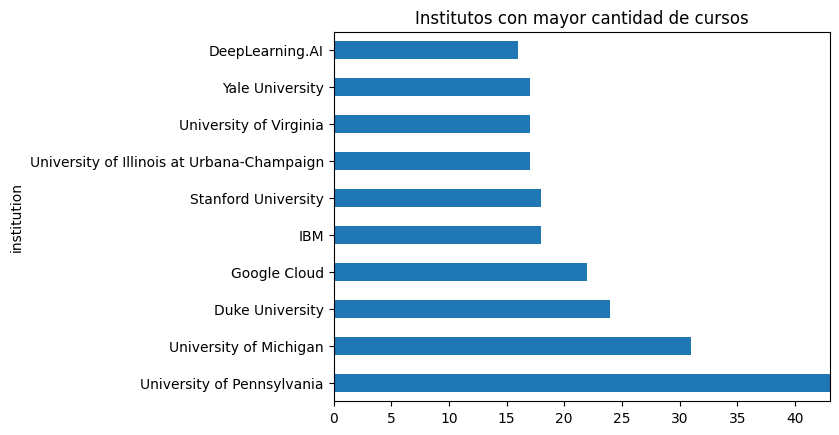

In [78]:
# Graficar los cursos más frecuentes
plot = coursera_courses['institution'].value_counts().head(10).plot(kind='barh',
                                                           title='Institutos con mayor cantidad de cursos')

# Ajustar límite del eje x
plot.set_xlim(0,(coursera_courses['institution'].value_counts().max()))

plt.show()


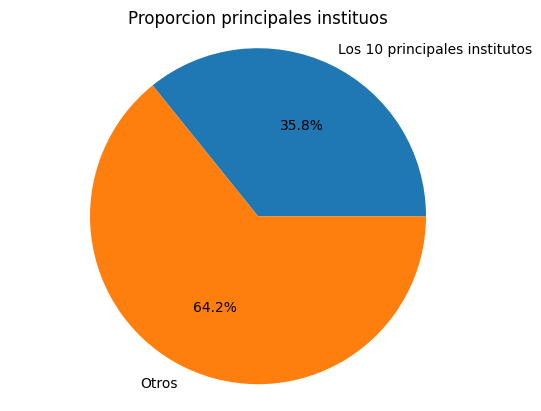

In [79]:
mayores_cantidades = coursera_courses['institution'].value_counts().head(10).sum()
#De todos los registros restamos lo que acumulan las 10 insituciones con mayores cursos
otros = coursera_courses['institution'].shape[0]-mayores_cantidades
valores = [mayores_cantidades,otros]
plt.pie(valores, labels =  ["Los 10 principales institutos","Otros"],autopct='%1.1f%%')
plt.axis("equal")
plt.title("Proporcion principales instituos")
plt.show()


Podemos ver que los 10 principales instituos tienen una representatividad muy importante en el total considerando que los otros instituos suman mas de 120.

Mas adelante realizando el analisis exploratorio de los cursos de edx vemos que Harvard es su instituto con mayor cantidad de cursos y nos lleva a preguntarnos la representacion de esta institucion para coursera

In [80]:
coursera_courses[coursera_courses["institution"].apply(lambda x:"harvard" in x.lower())]


,name,institution,course_url,course_id


Vemos que Harvard al momento de la generacion  de este dataset no tenia representacion en los cursos de coursera.Cabe destacar que edx nacio en parte desde Harvard y esto puede ser una de las principales razones por lo que los cursos de Harvard se imparten en edx.


### Course_url y Course_id

Por ahora solo veremos la calidad y que si se repiten ya que la url es el enlace para ir a los cursos y el id es muy similar a los nombres de los cursos

In [99]:
coursera_courses["course_url"].head()

0      https://www.coursera.org/learn/machine-learning
1     https://www.coursera.org/learn/indigenous-canada
2    https://www.coursera.org/learn/the-science-of-...
3    https://www.coursera.org/learn/technical-suppo...
4    https://www.coursera.org/learn/google-cbrs-cpi...
Name: course_url, dtype: object

In [101]:
coursera_courses[coursera_courses.duplicated(subset="course_id")]

,name,institution,course_url,course_id


Vemos si hay algun valor que no incluya https

In [103]:
coursera_courses[coursera_courses["course_id"].apply(lambda x:"https" in x)]

,name,institution,course_url,course_id


In [102]:
coursera_courses["course_id"].head()

0                  machine-learning
1                 indigenous-canada
2         the-science-of-well-being
3    technical-support-fundamentals
4          google-cbrs-cpi-training
Name: course_id, dtype: object

Vemos si hay algun id de curso que se repita

In [104]:
coursera_courses[coursera_courses.duplicated(subset="course_id")]

,name,institution,course_url,course_id


Al no haber duplicados ni valores nulos,tenemos 623 cursos diferentes

### COURSERA REVIEWS

In [20]:
coursera_reviews = pd.read_csv("Coursera_reviews.csv")

In [21]:
coursera_reviews

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


In [22]:
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [23]:
coursera_reviews.tail()

,reviews,reviewers,date_reviews,rating,course_id
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking
1454710,G,By Reza S,"Aug 12, 2018",5,computer-networking


In [24]:
coursera_reviews.duplicated().value_counts()

True     934764
False    519947
Name: count, dtype: int64

Algo que realmente llama la atencion es la importante cantidad de duplicados que tenemos en el dataset por lo que tendremos que eliminar gran parte de este para obtener informacion de calidad

In [25]:
coursera_reviews.drop_duplicates(inplace = True)

### Reviews

Vemos si hay faltantes

In [26]:
coursera_reviews["reviews"].isna().sum()

61

Vemos si de esos registros que no tienen reviews tanto sean nulos o tengan poco valor tampoco tienen un rating

In [27]:
coursera_reviews[coursera_reviews["reviews"].apply(lambda x: type(x) != str or len(x) < 6)][coursera_reviews["rating"].isna()]

C:\Users\jere belen\AppData\Local\Temp\ipykernel_17380\4188536012.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  coursera_reviews[coursera_reviews["reviews"].apply(lambda x: type(x) != str or len(x) < 6)][coursera_reviews["rating"].isna()]


,reviews,reviewers,date_reviews,rating,course_id


Generamos una nube de palabras con 1000 registros al azar para ver si podemos notar algun dato valioso

In [28]:
reviews = coursera_reviews["reviews"]

In [29]:
#Utilizamos el metodo sample para obtener registros al azar
reviews.dropna(inplace = True)
reviews = reviews[reviews.apply(lambda x: len(x) > 6)]
registros_al_azar = reviews.sample(n=1000)

In [30]:
texto_reviews = ''
for row in registros_al_azar:
    texto_reviews += row + ' '

In [171]:
texto_reviews

'This is a great course.  The only reason for not giving it 5 stars is the notebook platform for grading coding assignments.  It is flawed in that attempts to save often error out so a submission often doesn\'t contain the latest state of the code.  This causes sections to be graded incorrectly - very frustrating. This course is really helpful for me In my carrier  I would like to get more psychological tricks for negotiations as most of the information in the course is well known or very specific to USA law This was an excellent course. Thank you very much for all your hard work putting this together for us. It is a good course for improve our skills like writing The theory was fine, but I think it may need more practice on the learning process. Content is very useful. You have to read many topics from outside the course material to complete the assignments Every informational and I like how is brings up the many studies that they have done over the years. Its super interesting and ye

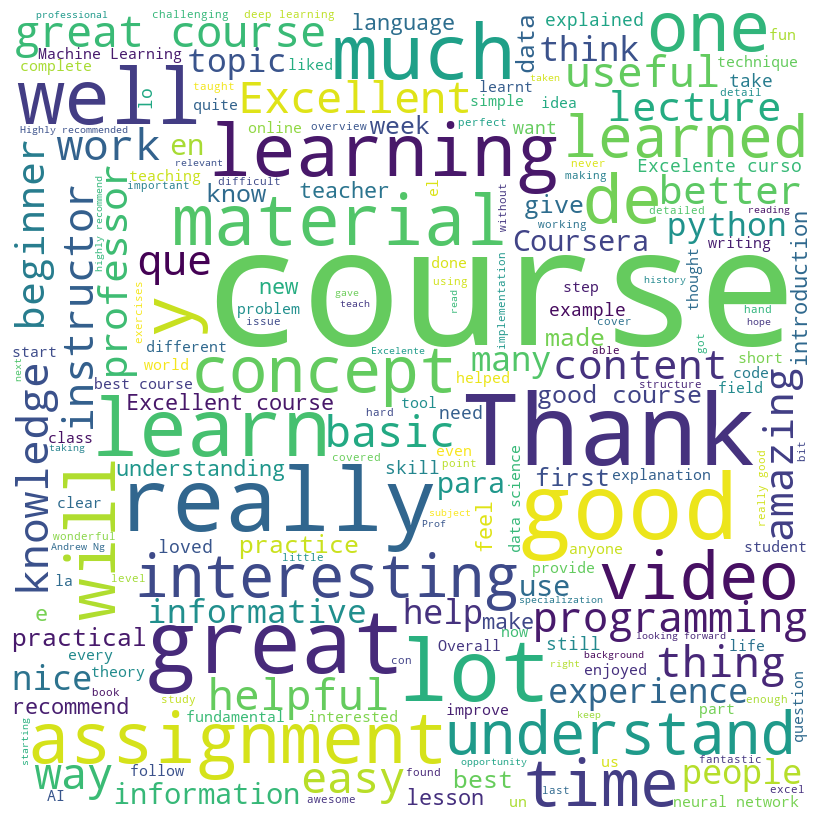

In [172]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color = 'white',
                min_font_size = 10).generate(texto_reviews)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Podemos notar que en general las palabras con mayor frecuencia tienen una connotacion positiva como interesting,good,excellent,helpful,etc

### Date_reviews

Variable cualitativa ordinal

In [31]:
coursera_reviews["date_reviews"].head()

0    Feb 12, 2020
1    Sep 28, 2020
2    Apr 08, 2020
3    Feb 24, 2020
4    Jun 18, 2020
Name: date_reviews, dtype: object

In [32]:
coursera_reviews["date_reviews"].isna().sum()

0

Cambiamos el tipo de dato a fecha para poder hacer inteligencia de tiempo

In [33]:
coursera_reviews["date_reviews"] = pd.to_datetime(coursera_reviews["date_reviews"])

### Reviewers

Variable cualitativa nominal.En este caso nos interesan todas las valoraciones sin importar de que persona provienen,pero utilizaremos la columna para suponer si las reseñas vienen de diferentes personas como indicador de  la cantidad de estudiantes.

In [34]:
coursera_reviews["reviewers"].isna().sum()

0

In [39]:
coursera_reviews["reviewers"].value_counts().mean()

1.8065759117189237

El promedio de cursos por alumno no llega a 2.Esto es un numero realmente bajo.

In [37]:
#agrupamos los nombres de alumnos diferentes por año
cantidad_de_alumnos_anios = coursera_reviews.groupby(coursera_reviews["date_reviews"].dt.year)['reviewers'].nunique()
cantidad_de_alumnos_mes = coursera_reviews.groupby(coursera_reviews["date_reviews"].dt.month)['reviewers'].nunique()

Ahora intentaremos ver un posible kpi a futuro de tasa de recompra.Aunque como hemos comentado previamente el total de reseñas no implica el total de alumnos.vamos a ver que alumnos vuelven a elegir otro curso dentro de la misma plataforma.

In [40]:
# Agrupamos por alumno y contamos los valores únicos de cursos por alumno
alumnos_recompra = coursera_reviews.groupby('reviewers')['course_id'].nunique()

# Filtrar los valores donde el número de cursos únicos sea mayor que 1
resultado = alumnos_recompra[alumnos_recompra > 1]

# Obtener el número total de revisores que cumplieron el criterio
total_reviewers_recompra = len(resultado)
total_reviewers_recompra

77344

In [ ]:
total_reviewers_recompra/coursera_reviews['reviewers'].nunique()

Hubo un 26 por ciento de alumnos que nos volvieron a elegir.Este es un posible kpi ya que queremos que nuestra plataforma sea la principal referencia para nuestros alumnos

Ahora buscaremos la media de meses que los alumnos que tienen mas de un curso hecho pasan en coursera y tienen a la plataforma en cuenta para su desarrollo academico.

In [66]:
# Creamos la primera máscara para identificar los alumnos con mas de una reviews
mascara = coursera_reviews['reviewers'].duplicated(keep=False)

# Filtramos el DataFrame utilizando la máscara
alumnos_con_mas_de_un_curso = coursera_reviews[mascara]

# Creamos la segunda máscara para verificar que los cursos sean diferentes para cada alumno
mascara_diferentes_cursos = alumnos_con_mas_de_un_curso.groupby('reviewers')['course_id'].transform('nunique') > 1

# Filtramos el DataFrame nuevamente utilizando la máscara adicional
alumnos_con_mas_de_un_curso_diferentes = alumnos_con_mas_de_un_curso[mascara_diferentes_cursos]

# Agrupamos por alumno y obtenemos el primer y último curso que hizo y la fecha correspondiente
primer_ultimo_fecha = alumnos_con_mas_de_un_curso_diferentes.groupby('reviewers').agg(
    fecha_primer_curso=('date_reviews', 'min'),
    fecha_ultimo_curso=('date_reviews', 'max')
)

# Calculamos la diferencia en meses entre el primer y último curso
primer_ultimo_fecha['diferencia_meses'] = (primer_ultimo_fecha['fecha_ultimo_curso'] - primer_ultimo_fecha['fecha_primer_curso']) / pd.Timedelta(days=30)

# Creamos una máscara para considerar solo aquellos alumnos con una diferencia en meses mayor a 1
mascara_mayor_un_mes = primer_ultimo_fecha['diferencia_meses'] > 1

# Filtramos el DataFrame nuevamente utilizando la máscara adicional
alumnos_con_diferencia_mayor_un_mes = primer_ultimo_fecha[mascara_mayor_un_mes]

# Calculamos la media de meses de diferencia solo para los alumnos con una diferencia mayor a 1 mes
media_meses_diferencia = alumnos_con_diferencia_mayor_un_mes['diferencia_meses'].mean()

# Imprimimos el resultado
print(f"Media de meses de diferencia: {media_meses_diferencia:.2f} meses")

Media de meses de diferencia: 21.53 meses


In [67]:
alumnos_con_diferencia_mayor_un_mes['diferencia_meses'].max(),alumnos_con_diferencia_mayor_un_mes['diferencia_meses'].min()

(62.9, 1.0333333333333334)

Vemos que el alumno que estuvo mas tiempo en coursera estuvo mas de 5 años y tenemos una media de 21 meses para alumnos que estuvieron mas de un mes.Con esto tenemos un periodo de tiempo promedio que funciona para saber durante cuanto tiempo los alumnos tienen a coursera como instituto de referencia para su educacion.

Hacemos un grafico de tendencia.

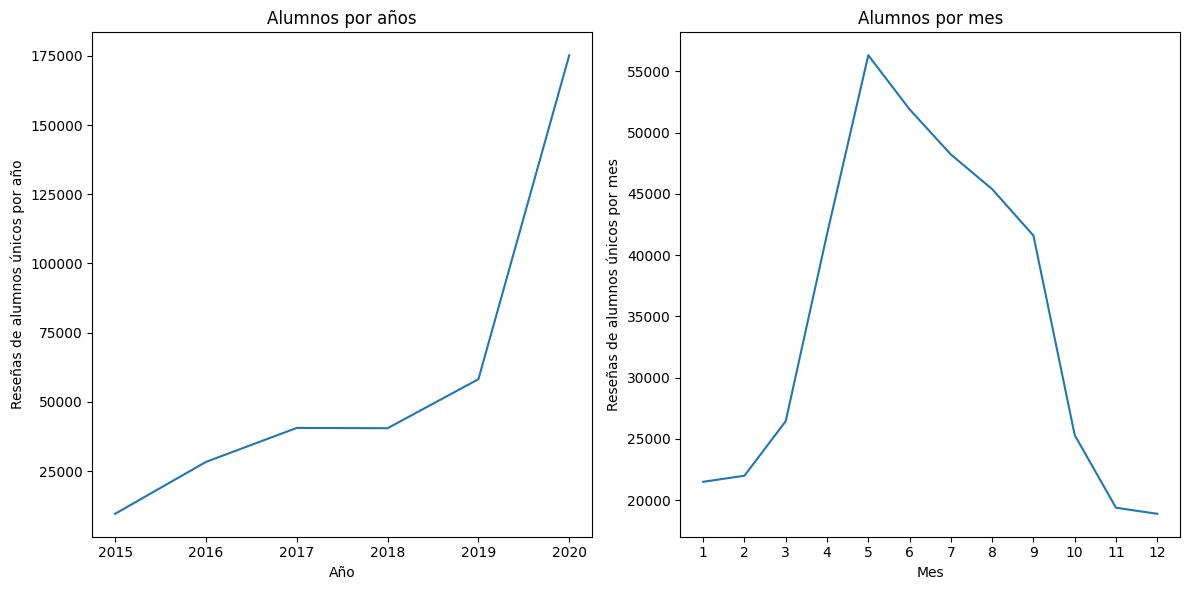

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
cantidad_de_alumnos_anios.plot(kind='line')  # Cambiar a gráfico de línea
plt.xlabel('Año')
plt.ylabel('Reseñas de alumnos únicos por año')
plt.title('Alumnos por años')


# Gráfico de línea para la frecuencia de los meses
plt.subplot(1, 2, 2)
cantidad_de_alumnos_mes.plot(kind='line')  # Cambiar a gráfico de línea
plt.xlabel('Mes')
plt.ylabel('Reseñas de alumnos únicos por mes')
plt.title('Alumnos por mes')
plt.xticks(np.arange(1, 13), np.arange(1, 13))  # Cambiar los valores y etiquetas del eje x

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Vemos que en el año 2020 hubo un crecimiento abrupto de reseñas hechas por alumnos diferentes,y aunque no implique necesariamente que tenga una correlacion directa con la cantidad de alumnos, ya que no tenemos esos datos y el grafico simplemente puede estar mostrandonos que aumento la cantidad de alumnos que hacen reseñas.Pero podemos suponer que por el contexto de la pandemia de coronavirus refleja un crecimiento de alumnos.

### Rating

El rating es una variable cuantitativa ordinal.Los valores van del 1 a 5  

In [179]:
coursera_reviews["rating"].isna().sum()

0

In [180]:
coursera_reviews["rating"].value_counts()

rating
5    408118
4     81401
3     17733
1      6625
2      6070
Name: count, dtype: int64

In [181]:
coursera_reviews["rating"].mean()

4.689243326723686

Text(0.5, 1.0, 'Rating anual')

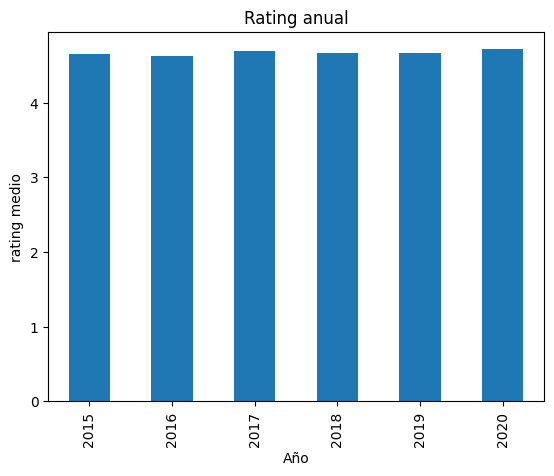

In [182]:
media_anios = coursera_reviews.groupby(coursera_reviews["date_reviews"].dt.year)['rating'].mean()
media_anios.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('rating medio')
plt.title('Rating anual')


Vemos no solo que tienen realmente un rating muy bueno si no que ademas este se mantuvo en mas de 4 durante todos los años

### Course_id

Variable cualitativa nominal

In [183]:
coursera_reviews["course_id"].head()

0    google-cbrs-cpi-training
1    google-cbrs-cpi-training
2    google-cbrs-cpi-training
3    google-cbrs-cpi-training
4    google-cbrs-cpi-training
Name: course_id, dtype: object

Vemos si hay nulos

In [184]:
coursera_reviews["course_id"].isna().sum()

0

Vemos la cantidad de cursos.

In [185]:
coursera_reviews["course_id"].unique().shape[0]

604

La cantidad de cursos en la tabla course es 623 y aca vemos que solo hay 604 por lo que buscaremos cuales son los cursos que posiblemente aun no tengan reseña.

In [186]:
#El resultado de isin() es una máscara booleana que indica qué valores de la serie original están presentes en los valores especificados.
#El operador ~ se utiliza en este contexto para invertir una condición booleana
cursos_sin_reseña = coursera_courses[~coursera_courses['course_id'].isin(coursera_reviews['course_id'])]
cursos_sin_reseña

,name,institution,course_url,course_id
57,Game Theory,Stanford University,https://www.coursera.org/learn/game-theory-1,game-theory-1
84,Organizational Analysis,Stanford University,https://www.coursera.org/learn/organizational-...,organizational-analysis
109,"Divide and Conquer, Sorting and Searching, and...",Stanford University,https://www.coursera.org/learn/algorithms-divi...,algorithms-divide-conquer
159,Circular Economy - Sustainable Materials Manag...,Delft University of Technology,https://www.coursera.org/learn/circular-economy,circular-economy
225,Fundamentals of Music Theory,The University of Edinburgh,https://www.coursera.org/learn/edinburgh-music...,edinburgh-music-theory
260,Unraveling the Cycling City,University of Amsterdam,https://www.coursera.org/learn/unraveling-the-...,unraveling-the-cycling-city
301,Digital Media and Marketing Strategies,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/marketing-plan,marketing-plan
359,The Changing Global Order,Universiteit Leiden,https://www.coursera.org/learn/changing-global...,changing-global-order
400,De-Mystifying Mindfulness,Universiteit Leiden,https://www.coursera.org/learn/mindfulness,mindfulness
404,Probabilistic Graphical Models 1: Representation,Stanford University,https://www.coursera.org/learn/probabilistic-g...,probabilistic-graphical-models


Creo que lo mas interesante es que podamos ver el rating por curso

In [187]:
rating_curso = coursera_reviews.groupby(coursera_reviews["course_id"])['rating'].mean()
rating_curso = rating_curso.sort_values(ascending = False)
rating_curso[rating_curso<4]

course_id
html                                             3.988809
sequence-models-in-nlp                           3.967742
google-cloud-java-spring                         3.943005
introduction-to-computer-programming             3.920290
finance-fundamentals                             3.888889
instructional-design-foundations-applications    3.860215
convolutional-neural-networks                    3.855375
write-your-first-novel                           3.850000
recruiting-hiring-onboarding-employees           3.843750
geopolitics-europe                               3.734940
project-execution                                3.722222
analytics-excel                                  3.712673
wharton-introduction-spreadsheets-models         3.618881
japanese-1                                       3.611111
accounting-data-analytics-python                 3.500000
big-data-essentials                              3.484127
introduction-trading-machine-learning-gcp        3.463768
pca-

Creo que lo que mas destacan son los 4 cursos con la media de 1.Veamos la cantidad de votos que tienen y cuales son las reseñas.

In [188]:
# Condiciones de filtrado
condicion1 = coursera_reviews["course_id"] == "social-economic-networks"
condicion2 = coursera_reviews["course_id"] == "curanderismo-plants"
condicion3 = coursera_reviews["course_id"] == "entrepreneurship-strategy"
condicion4 = coursera_reviews["course_id"] == "epigenetics"

# Crear la máscara combinando las condiciones con el operador lógico `|`
mascara = (condicion1 | condicion2 | condicion3 | condicion4)

# Aplicar la máscara al DataFrame
bajo_puntaje = coursera_reviews[mascara]

# Imprimir el resultado
bajo_puntaje

,reviews,reviewers,date_reviews,rating,course_id
1046787,My certificate does not want to be released,Started Sep 28,2020-07-20,1,entrepreneurship-strategy
1046788,knowing who you are? give me a break...,By Chujor A O,2019-05-01,1,entrepreneurship-strategy
1046789,My certificate does not want to be released,By Edin F,2020-07-20,1,entrepreneurship-strategy
1046790,knowing who you are? give me a break...,Started Sep 28,2019-05-01,1,entrepreneurship-strategy
1046791,My certificate does not want to be released,By Chujor A O,2020-07-20,1,entrepreneurship-strategy
1046792,knowing who you are? give me a break...,By Edin F,2019-05-01,1,entrepreneurship-strategy
1236372,"boring lecturer, monotone, passionless reading...",No Upcoming Session Available,2016-03-22,1,epigenetics
1236373,the whole lecture given by the lecturer is so ...,By robert t,2017-07-31,1,epigenetics
1236374,"boring lecturer, monotone, passionless reading...",By Dong M,2016-03-22,1,epigenetics
1236375,the whole lecture given by the lecturer is so ...,No Upcoming Session Available,2017-07-31,1,epigenetics


Podemos notar que no solo son pocos los reviews si no que ademas se repiten los reviewers,por lo que podemos determinar que coursera tiene realmente un rating muy elevado para sus cursos

In [189]:
coursera_reviews["course_id"].value_counts().head(10)

course_id
python                            15226
machine-learning                  12677
neural-networks-deep-learning     12292
technical-support-fundamentals    12055
learning-how-to-learn             11871
python-data                       11422
the-science-of-well-being          8199
what-is-datascience                7397
ai-for-everyone                    7386
excel-essentials                   7377
Name: count, dtype: int64

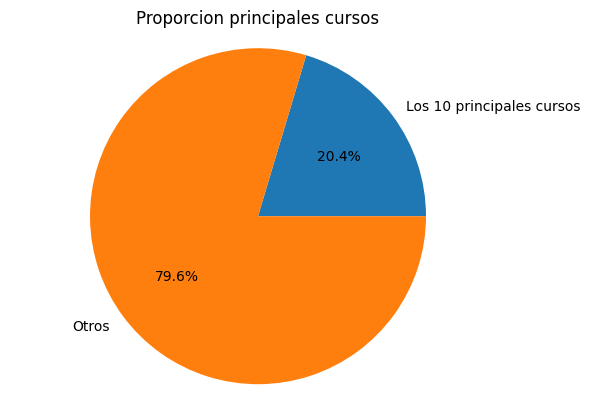

In [192]:
mayores_cantidades = coursera_reviews['course_id'].value_counts().head(10).sum()
#De todos los registros restamos lo que acumulan los 10 cursos con mayores reseñas
otros = coursera_reviews.shape[0]-mayores_cantidades
valores = [mayores_cantidades,otros]
plt.pie(valores, labels =  ["Los 10 principales cursos","Otros"],autopct='%1.1f%%')
plt.axis("equal")
plt.title("Proporcion principales cursos")
plt.show()

Vemos que los 10 principales cursos representan aproximadamente 20% de las reseñas un numero nada despreciable teniendo en cuenta que el total de cursos es mas de 600 y podemos suponer que tambien son los que representan una mayor cantidad de alumnado.Y gran parte de estos cursos son sobre datos.

Creamos un pequeño dataframe y hacemos un grafico de barras

In [194]:
lista_principales_cursos = ["python", "machine-learning", "neural-networks-deep-learning", "technical-support-fundamentals","learning-how-to-learn", "python-data", "the-science-of-well-being","what-is-datascience", "ai-for-everyone", "excel-essentials"]
valores = [15226, 12677, 12292, 12055, 11871, 11422, 8199,  7397, 7386,  7377]

principales_instituciones = {
    "Institución": ["DeepLearning.AI", "Google", "IBM", "Macquarie University", "Stanford University", "University of California San Diego", "University of Michigan", "Yale University"],
    "Cursos": [["ai-for-everyone", "neural-networks-deep-learning"], ["technical-support-fundamentals"], ["what-is-datascience"], ["excel-essentials"], ["machine-learning"], ["learning-how-to-learn"], ["python", "python-data"], ["the-science-of-well-being"]]
}

# Crear el DataFrame
data_instituciones = pd.DataFrame(principales_instituciones)
data_instituciones['Valores'] = data_instituciones['Cursos'].apply(lambda cursos: sum([valores[lista_principales_cursos.index(curso)] for curso in cursos]))

# Imprimir el DataFrame
data_instituciones

,Institución,Cursos,Valores
0,DeepLearning.AI,"[ai-for-everyone, neural-networks-deep-learning]",19678
1,Google,[technical-support-fundamentals],12055
2,IBM,[what-is-datascience],7397
3,Macquarie University,[excel-essentials],7377
4,Stanford University,[machine-learning],12677
5,University of California San Diego,[learning-how-to-learn],11871
6,University of Michigan,"[python, python-data]",26648
7,Yale University,[the-science-of-well-being],8199


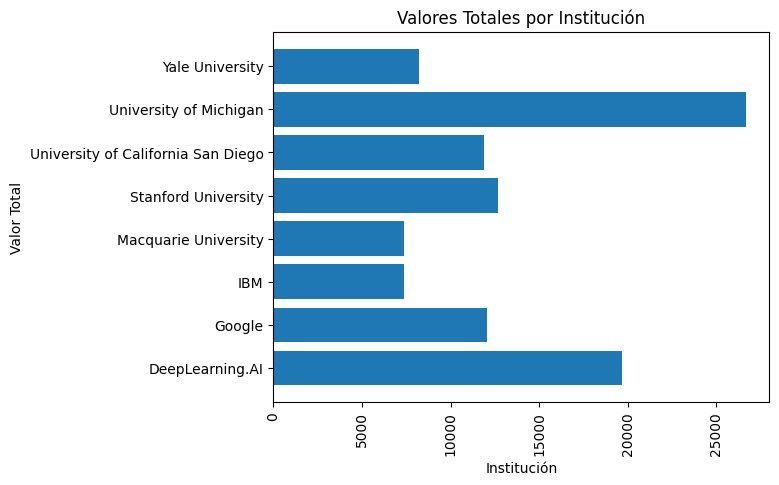

In [195]:
plt.barh(data_instituciones['Institución'], data_instituciones['Valores'])
plt.xlabel('Institución')
plt.ylabel('Valor Total')
plt.title('Valores Totales por Institución')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

Comparando esta grafica con la de instituos de mayor cantidad de cursos,notamos aqui que solo dos no pertenecen al grupo que son Macquarie University y University of california San Diego.

### EDX COURSES

In [81]:
edx = pd.read_csv("edx_courses.csv")

In [82]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [83]:
edx.columns

Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object')

In [84]:
edx.duplicated().value_counts()

False    974
True       1
Name: count, dtype: int64

In [85]:
edx.drop_duplicates(inplace = True)

### Title

Los titulos son una variable cualitativa nominal.

In [86]:
edx["title"]

0                                    How to Learn Online
1      Programming for Everybody (Getting Started wit...
2                CS50's Introduction to Computer Science
3                                     The Analytics Edge
4      Marketing Analytics: Marketing Measurement Str...
                             ...                        
970    Leaders in Citizen Security and Justice Manage...
971                Pattern Studying and Making | 图案审美与创作
972    Computational Neuroscience: Neuronal Dynamics ...
973    Cities and the Challenge of Sustainable Develo...
974                        MathTrackX: Special Functions
Name: title, Length: 974, dtype: object

In [87]:
edx["title"].isna().sum()

0

In [88]:
edx[edx["title"].duplicated(keep = False)]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
159,Marketing Management,Learn how to effectively apply marketing manag...,"80,010",Self-paced on your time,Indian Institute of Management Bangalore,Ashis Mishra,Intermediate,Business & Management,English,"English, हिन्दी",2–4 hours per week,9 Weeks,FREE-Add a Verified Certificate for $150 USD,According to world-renowned management consult...,NaN,https://www.edx.org/course/marketing-management
161,Introduction to Marketing,"Learn the fundamentals to marketing, including...","169,126",Self-paced on your time,University of British Columbia,Darren Dahl-Paul Cubbon,Introductory,Business & Management,English,English,3–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $150 USD,Marketing is a crucial function in all busines...,NaN,https://www.edx.org/course/introduction-to-mar...
388,Marketing Management,Learn key marketing strategies and tactics to ...,"43,415",Instructor-led on a course schedule,"The University of Maryland, College Park-Unive...",Judy Frels-David Godes-P.K. Kannan-Mary Beth F...,Advanced,Business & Management,English,English,8–10 hours per week,7 Weeks,FREE-Add a Verified Certificate for $214 USD,"Mark Cuban, owner of the Dallas Mavericks, put...",NaN,https://www.edx.org/course/marketing-management-2
561,Introduction to Marketing,An introduction to the role of marketing in a ...,NaN,Self-paced on your time,The University of Edinburgh,Ewelina Lacka-Malcolm Kirkup-Asanka de Silva-A...,Introductory,Business & Management,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $149 USD,Do you want to learn how successful businesses...,NaN,https://www.edx.org/course/introduction-to-mar...


Vemos que los titulos repetidos corresponden a instituciones diferentes.Por lo que podemos considerar que la cantidad de cursos que se imparten en edx es de 974.

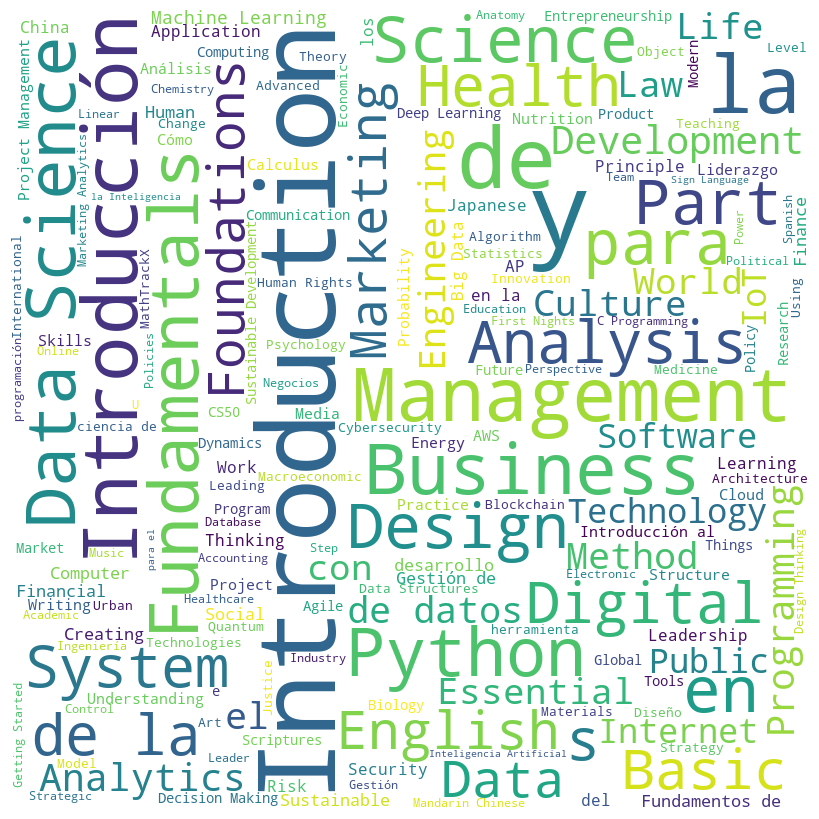

In [90]:
texto = ''
for row in edx['title']:
    texto += row + ' '
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(texto)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Encontramos el mismo patron que en la nube de palabras de cursos en coursera resaltando el nivel introductorio de los cursos,nuevamente resalta python y datos,acompañado por orientacion a los negocios,marketing,etc.Pero en este caso hay una mayor variedad de temas que tambien resaltan su frecuencia como el caso de Ingles y Health que en principio pareciera tener mayor frecuencia que en coursera.Otro punto importante es que tenemos gran mayoria de palabras en ingles pero tambien varias en español comparativamente a coursera.
Esto nos da una primera hipotesis con respecto a la variedad de cursos y a una mayor atencion al alumnado hispano hablante.

### Summary

Los resumenes de los cursos son una variable cualitativa nominal.

In [9]:
edx["summary"]

0      Learn essential strategies for successful onli...
1      This course is a "no prerequisite" introductio...
2      An introduction to the intellectual enterprise...
3      Through inspiring examples and stories, discov...
4         This course is part of a MicroMasters® Program
                             ...                        
970    Learn about the latest in prevention, police a...
971    Fantastic experiences in beauty and its repres...
972    This course explains the mathematical and comp...
973    What is a sustainable city? Learn the basics h...
974    Understand trigonometric, exponential and loga...
Name: summary, Length: 975, dtype: object

In [13]:
edx["summary"].isna().sum()

53

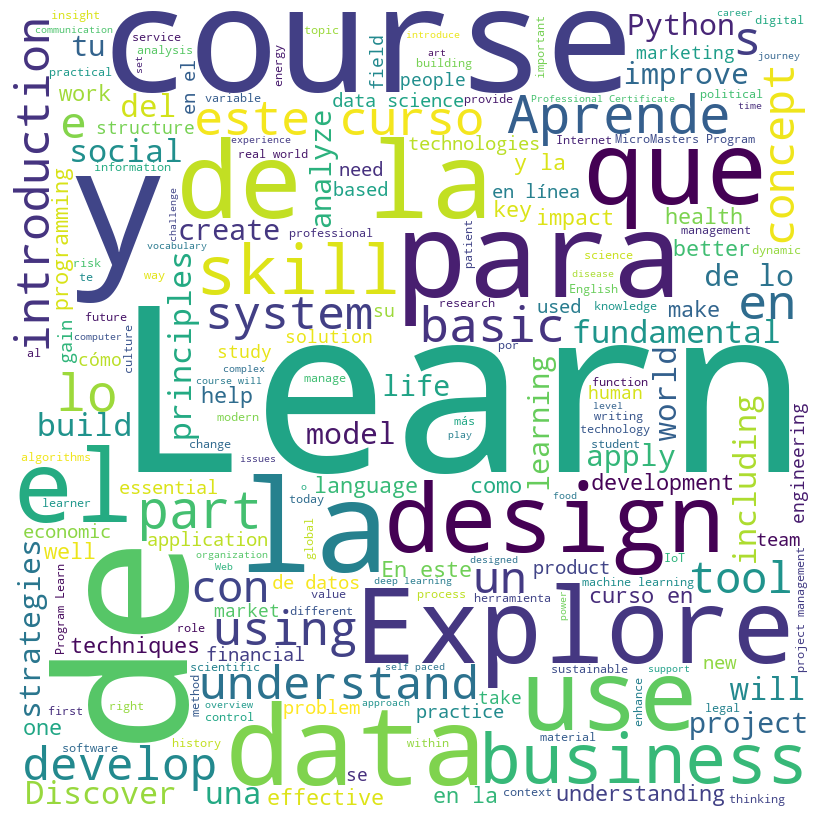

In [28]:
texto_summary = ''
for row in edx['summary']:
    if type(row) == str:
        texto_summary += row + ' '

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(texto_summary)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### N_enrolled

El matriculado es un tipo de dato cuantitativo discreto y vemos que tiene "," asi que las sacamos y cambiamos a int.Utilizaremos

In [48]:
edx["n_enrolled"].head()

0      124,980
1      293,864
2    2,442,271
3      129,555
4       81,140
Name: n_enrolled, dtype: object

In [54]:
type(edx["n_enrolled"][0])

str

In [52]:
edx["n_enrolled"].isna().sum()

120

In [53]:
edx[edx["n_enrolled"] == "0"]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url


Vemos que no hay valores con 0 por lo que utilizaremos este para los valores sin dato

In [91]:
edx["n_enrolled"].fillna("0",inplace = True)

In [92]:
edx["n_enrolled"] = edx["n_enrolled"].apply(lambda x: x.replace(",",""))

In [93]:
edx["n_enrolled"] = edx["n_enrolled"].astype(int)

In [60]:
edx["n_enrolled"].sort_values(ascending =False).head()

2     2442271
29    1103777
31    1022489
23     698950
64     642088
Name: n_enrolled, dtype: int32

Vemos la media sin tomar en cuenta los sin datos ahora 0

In [61]:
edx[edx["n_enrolled"] != 0]["n_enrolled"].mean()

53260.350877192985

In [71]:
edx[edx["n_enrolled"] != 0]["n_enrolled"]

0       124980
1       293864
2      2442271
3       129555
4        81140
        ...   
964      20355
966       8657
969      41902
972      11246
973       8775
Name: n_enrolled, Length: 855, dtype: int32

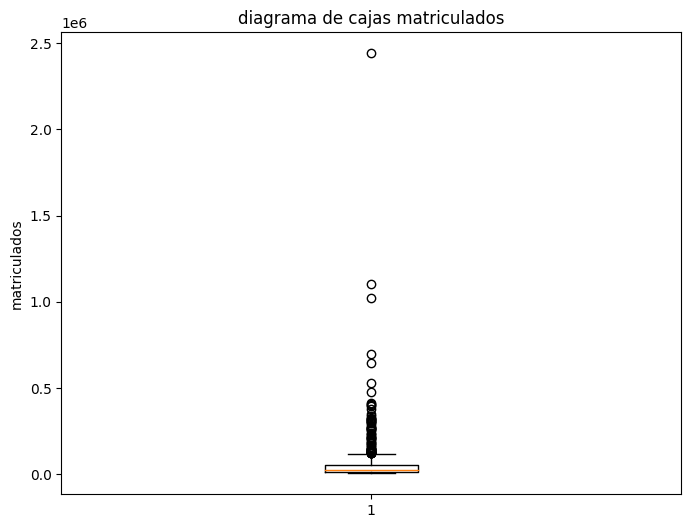

In [72]:
plt.figure(figsize=(8, 6))
plt.boxplot(edx[edx["n_enrolled"] != 0]["n_enrolled"])
plt.ylabel('matriculados')
plt.title("diagrama de cajas matriculados")
plt.show()

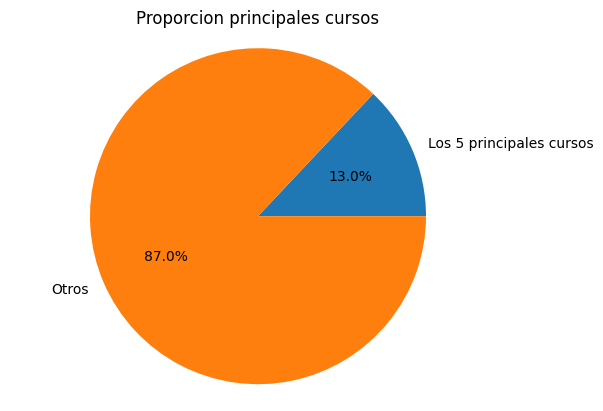

In [33]:
mayores_matriculados = (edx[edx["n_enrolled"] != 0]["n_enrolled"]).sort_values(ascending = False).head(5).sum()
#De todos los registros restamos lo que acumulan las 10 insituciones con mayores cursos
otros = edx["n_enrolled"].sum()-mayores_matriculados
valores = [mayores_matriculados,otros]
plt.pie(valores, labels =  ["Los 5 principales cursos","Otros"],autopct='%1.1f%%')
plt.axis("equal")
plt.title("Proporcion principales cursos")
plt.show()

Este no es un valor para nada despreciable teniendo en cuenta que aproximadente el total de cursos es de 1000

Veamos un poco mas sobre estos 5 cursos.

In [202]:
edx.loc[[2,29,31,23,64]]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
29,IELTS Academic Test Preparation,Prepare for the IELTS Academic tests in this c...,1103777,Self-paced on your time,The University of Queensland,Iain Mathieson-Martin Dutton-Megan Yucel-Steph...,Introductory,Communication,English,English,5–10 hours per week,8 Weeks,FREE-Add a Verified Certificate for $99 USD,IELTS is the world's most popular English lang...,MODULE 1: LISTENING\nThe module begins with an...,https://www.edx.org/course/ielts-academic-test...
31,TOEFL® Test Preparation: The Insider’s Guide,Prepare for the TOEFL® test and learn how to i...,1022489,Self-paced on your time,Educational Testing Service,Michael Knab-Cynthia Newman-Shawn Gorman-Molly...,Introductory,Communication,English,English,2–4 hours per week,6 Weeks,FREE-Add a Verified Certificate for $49 USD,"This test preparation course, developed by the...",NaN,https://www.edx.org/course/toefl-test-preparat...
23,CS50's Web Programming with Python and JavaScript,"This course picks up where CS50 leaves off, di...",698950,Self-paced on your time,Harvard University,David J. Malan-Brian Yu,Intermediate,Computer Science,English,English,6–9 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"Topics include database design, scalability, s...",NaN,https://www.edx.org/course/cs50s-web-programmi...
64,Introduction to Linux,Never learned Linux? Want a refresh? Develop a...,642088,Self-paced on your time,The Linux Foundation,Jerry Cooperstein,Introductory,Computer Science,English,English,5–7 hours per week,14 Weeks,FREE-Add a Verified Certificate for $199 USD,Develop a good working knowledge of Linux usin...,NaN,https://www.edx.org/course/introduction-to-linux


Podemos ver que 4 de los 5 son de nivel introductorio,2 de 5 pertenecen a Harvard university,los 5 son en idioma ingles,los 5 son para hacerlo a tu tiempo,los 5 son gratis con opcion de compra de certificado,3 son del area de computer science y 2 de comunicacion.Los 2 cursos de harvard pertenenecen al cs50 y siendo uno introductorio y el otro intermedio podemos deducir que siguen una linea de aprendizaje,fuimos al link web para verificarlo y es asi.Podemos notar entonces que el 70% del alumnado no continua al curso de nivel intermedio.

### Course type

Tipo de dato cualitativo nominal.

In [5]:
edx["course_type"].head()

0                Self-paced on your time
1                Self-paced on your time
2                Self-paced on your time
3    Instructor-led on a course schedule
4                Self-paced on your time
Name: course_type, dtype: object

In [6]:
edx["course_type"].isna().sum()

0

In [9]:
edx["course_type"].value_counts()

course_type
Self-paced on your time                916
Instructor-led on a course schedule     58
Name: count, dtype: int64

Rapidamente vemos que la mayoria de los cursos son para hacer a tu propio tiempo,veremos los de instructor a ver si encontramos algun dato de interes.En principio solo notamos que puede haber algo relacionado con el nivel y/o la institucion

In [12]:
edx[edx["course_type"] == "Instructor-led on a course schedule"]["institution"].value_counts()

institution
Massachusetts Institute of Technology                                     14
Columbia University                                                        8
Université catholique de Louvain                                           6
Chalmers University of Technology                                          5
New York University                                                        3
University System of Maryland-University of Maryland Global Campus         3
Delft University of Technology                                             3
The University of Queensland                                               3
The University of Maryland, College Park-University System of Maryland     2
Curtin University                                                          2
Boston University                                                          2
Harvard University                                                         1
Universidad del Rosario                                         

In [14]:
edx[edx["course_type"] == "Instructor-led on a course schedule"]["Level"].value_counts()

Level
Advanced        29
Introductory    17
Intermediate    12
Name: count, dtype: int64

In [17]:
edx[edx["Level"] == "Advanced"]["Level"].value_counts()

Level
Advanced    87
Name: count, dtype: int64

In [16]:
edx[edx["course_type"] == "Instructor-led on a course schedule"][edx["Level"] == "Advanced"]["institution"].value_counts()

C:\Users\jere belen\AppData\Local\Temp\ipykernel_12696\3501674197.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  edx[edx["course_type"] == "Instructor-led on a course schedule"][edx["Level"] == "Advanced"]["institution"].value_counts()


institution
Massachusetts Institute of Technology                                     8
Columbia University                                                       6
Chalmers University of Technology                                         5
Boston University                                                         2
The University of Maryland, College Park-University System of Maryland    2
Delft University of Technology                                            2
Université catholique de Louvain                                          1
The University of Queensland                                              1
University System of Maryland-University of Maryland Global Campus        1
Curtin University                                                         1
Name: count, dtype: int64

In [22]:
edx[edx["institution"] == "Columbia University"][edx["Level"] == "Advanced"].shape

C:\Users\jere belen\AppData\Local\Temp\ipykernel_12696\891218448.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  edx[edx["institution"] == "Columbia University"][edx["Level"] == "Advanced"].shape


(6, 16)

In [21]:
edx[edx["institution"] == "Chalmers University of Technology"][edx["Level"] == "Advanced"].shape

C:\Users\jere belen\AppData\Local\Temp\ipykernel_12696\4005003950.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  edx[edx["institution"] == "Chalmers University of Technology"][edx["Level"] == "Advanced"].shape


(5, 16)

De 974 cursos solo 87 son de nivel avanzado y 29,el 33%,son con un instructor y cronograma en vivo.Para finalizar vemos que algunos de los instituos con mayor cantidad de este tipo de cursos imparten con profesor en vivo la totalidad de sus cursos avanzados,por lo que vemos una fuerte relacion con que el curso pertenezca a estos institutos ademas sean avanzados con que sea del tipo Instructor-led on a course schedule.

### Institution

Tipo de datos cualitativo nominal.Vamos a repetir el analisis hecho para coursera.

In [30]:
edx["institution"]

0                                           edX
1                    The University of Michigan
2                            Harvard University
3         Massachusetts Institute of Technology
4            University of California, Berkeley
                         ...                   
970             Inter-American Development Bank
971                         Tsinghua University
972    École polytechnique fédérale de Lausanne
973                                 SDG Academy
974                      University of Adelaide
Name: institution, Length: 974, dtype: object

In [31]:
edx["institution"].isna().sum()

0

In [33]:
for i,elemento in enumerate(edx['institution']):
    if elemento.isdigit() == True:
        print(i,elemento)

In [10]:

cantidad_instituos = edx['institution'].unique().shape[0]
media = edx['institution'].value_counts().mean()
desviacion_estandar = edx['institution'].value_counts().std()
cantidad_instituos,media,desviacion_estandar


(111, 8.783783783783784, 12.358585830694533)

Con respecto a coursera aproximadamente duplica tanto la media como la desviacion estandarr de cursos por institucion,con 23 instituciones menos.Esto significa que aunque en promedio cada instituo le corresponde mayor cantidad de cursos tambien las distintas cantidades estan mas alejadas de la media.

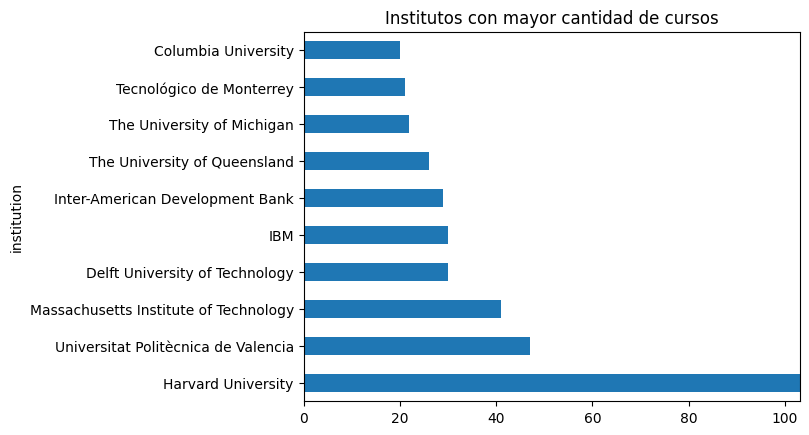

In [35]:
plot = edx['institution'].value_counts().head(10).plot(kind='barh',
                                                           title='Institutos con mayor cantidad de cursos')

# Ajustar límite del eje x
plot.set_xlim(0,(edx['institution'].value_counts().max()))

plt.show()

Notamos la importancia de Harvard University tanto en cantidad de cursos impartidos como tenes 2 de los 5 cursos con mas matriculados y nos llevo a preguntar como era esta representacion para coursera y encontramos que sus cursos no tienen representacion en coursera.

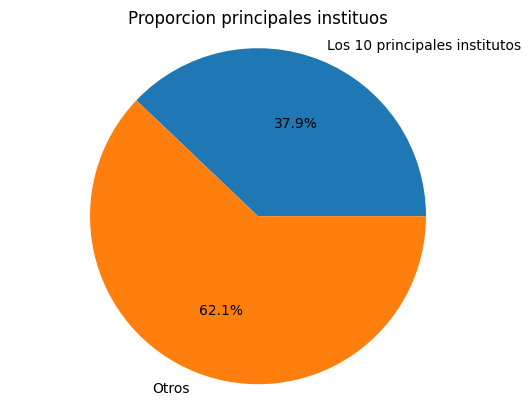

In [36]:
mayores_cantidades = edx['institution'].value_counts().head(10).sum()
#De todos los registros restamos lo que acumulan las 10 insituciones con mayores cursos
otros = edx['institution'].shape[0]-mayores_cantidades
valores = [mayores_cantidades,otros]
plt.pie(valores, labels =  ["Los 10 principales institutos","Otros"],autopct='%1.1f%%')
plt.axis("equal")
plt.title("Proporcion principales instituos")
plt.show()

Con respecto a la representacion de los 10 instituos con mayor cantidad de cursos con respecto al total el valor es muy similar que coursera.

### Instructors

Tipo de dato cualitativo nominal.Los distintos instructores estan separados por "-".Intentaremos ver los 5 profesores con mayor cantidad de cursos ademas buscaremos saber si los instructores tiene impacto en la cantidad de alumnos matriculados.

In [31]:
edx["instructors"].head()

0              Nina Huntemann-Robyn Belair-Ben Piscopo
1                                    Charles Severance
2                   David J. Malan-Doug Lloyd-Brian Yu
3    Dimitris Bertsimas-Allison O'Hair-John Silberh...
4                                       Stephan Sorger
Name: instructors, dtype: object

In [24]:
edx["instructors"].isna().sum()

3

Vemos que la gran mayoria tiene un profesor asignado,veremos si logramos ver algo en los que no

In [28]:
edx[edx["instructors"].isna()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
390,Analytics in Python,Learn the fundamental of programming in Python...,"82,210",Instructor-led on a course schedule,Columbia University,NaN,Intermediate,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,Data is the lifeblood of an organization. Comp...,NaN,https://www.edx.org/course/analytics-in-python
401,Just Reading and Writing in English | 生活英语读写,Learn how to read and write in English in the ...,"33,303",Self-paced on your time,Tsinghua University,NaN,Introductory,Art & Culture,English,English,2–4 hours per week,15 Weeks,FREE-Add a Verified Certificate for $149 USD,Reading enriches our life and writing enables ...,Week 1 - Learning\nIntroduction to the problem...,https://www.edx.org/course/just-reading-and-wr...
516,"Data, Models and Decisions in Business Analytics",Learn fundamental tools and techniques for usi...,"36,289",Instructor-led on a course schedule,Columbia University,NaN,Advanced,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,"In today’s world, managerial decisions are inc...",NaN,https://www.edx.org/course/data-models-and-dec...


Vemos que 2 de 3 perteneces a Columbia University en vivo sobre bussines y managment orientado a datos.Actualmente estos cursos no se estan impartiendo.

Como vemos que los instructores estan separados por "-" vamos a hacer un split para separarlos,guardar los valores en distintas columnas y luego hacerlas filas para poder obtener la cantidad de cursos por instructor con la funcion value_counts()

In [125]:
instructores = edx['instructors'].str.split('-').apply(pd.Series).stack().reset_index(drop=True)
instructores.name = 'instructors'

# Contar cuántas veces aparece cada instructor
instructores_counts = instructores.value_counts()
instructores_counts

instructors
Rafael Irizarry             16
Peter K. Bol                 9
Jeffrey D. Sachs             9
William C. Kirby             8
Rav Ahuja                    8
                            ..
Rafael Serrano               1
Andrés Lloret Salom          1
Julie Carmean                1
Juan Carlos Lemus Romero     1
Wulfram Gerstner             1
Name: count, Length: 1556, dtype: int64

Pasamos la serie a un dataframe con nombre en la columna instructors y borramos los duplicados para quedarnos con los nombres unicos

In [129]:
instructores = pd.DataFrame({'instructors': instructores}).drop_duplicates()

In [133]:
instructores["instructors"]

0           Nina Huntemann
1             Robyn Belair
2              Ben Piscopo
3        Charles Severance
4           David J. Malan
               ...        
2079      Stefano Pascucci
2086     Gabriela González
2087    Brian Powers, M.A.
2099            Yuehua Nie
2100      Wulfram Gerstner
Name: instructors, Length: 1556, dtype: object

In [155]:
(instructores["instructors"]=="Co").value_counts()

instructors
False    1555
True        1
Name: count, dtype: int64

In [142]:
# Creamos una nueva columna 'cantidad_alumnos' en instructores y asignamos un valor inicial de 0
instructores['cantidad_alumnos'] = 0

# Iterar sobre los instructores y buscar su nombre en la columna 'instructors' del DataFrame principal de edx para obtener solo los cursos en los que participaron,despues sumamos la cantidad de alumnos de los mismos y lo asignamos al dataframe auxiliar de trabajo instructores
for instructor in instructores["instructors"]:
    mask = edx['instructors'].fillna("").str.contains(instructor)
    suma_alumnos = edx[mask]["n_enrolled"].sum()
    instructores.loc[instructores['instructors'] == instructor, 'cantidad_alumnos'] = suma_alumnos



C:\Users\jere belen\AppData\Local\Temp\ipykernel_12696\1573320436.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = edx['instructors'].fillna("").str.contains(instructor)


             instructors  cantidad_alumnos
0         Nina Huntemann            153293
1           Robyn Belair            132938
2            Ben Piscopo            153293
3      Charles Severance            411237
4         David J. Malan           3956549
...                  ...               ...
2079    Stefano Pascucci              6480
2086   Gabriela González              8657
2087  Brian Powers, M.A.                 0
2099          Yuehua Nie                 0
2100    Wulfram Gerstner             11246

[1556 rows x 2 columns]


Ahora tenemos los 5 profesores con mayor cantidad de alumnos,la razon de todo este proceso es que al haber cursos con varios profesores se dificultaba analisis mas generales por las posibles combinatorias,vamos a buscar informacion relevante de la columna instructores en base a estos 5 profesores con mas alumnos.

In [145]:
instructores.sort_values("cantidad_alumnos",ascending = False).head()

,instructors,cantidad_alumnos
4,David J. Malan,3956549
6,Brian Yu,3399227
5,Doug Lloyd,2529607
1755,Co,2467171
39,Rafael Irizarry,2095650


In [158]:
edx[edx['instructors'].fillna("").str.contains("-Co-")]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
824,Co-Creating Sustainable Cities,Learn how citizen’s co-creation is key in maki...,12415,Self-paced on your time,Delft University of Technology-Wageningen Univ...,Gert Spaargaren-Ellen van Bueren-Co-creating s...,Advanced,Social Sciences,English,English,6–8 hours per week,8 Weeks,FREE-Add a Verified Certificate for $49 USD,"Around the world, major challenges of our time...",Module 1: Background Knowlegde for Co-Creating...,https://www.edx.org/course/co-creating-sustain...


Vemos que 4 de los 5 profesores son los encargados de impartir los cursos de Harvard por lo que no podriamos decir con certeza cual es su impacto en el nro de alumnos y cual es el de Harvard,el otro "Co",vemos que se debe a un valor surgido por la falta de integridad en un registro.

Veremos los proximos 5 instructores para ver si podemos enriquecer el analisis o si descartaremos la columna en futuros analisis.

In [159]:
instructores.sort_values("cantidad_alumnos",ascending = False).head(10)

,instructors,cantidad_alumnos
4,David J. Malan,3956549
6,Brian Yu,3399227
5,Doug Lloyd,2529607
1755,Co,2467171
39,Rafael Irizarry,2095650
19,Thomas,1216444
61,Stephen Walker,1103777
60,Megan Yucel,1103777
59,Martin Dutton,1103777
58,Iain Mathieson,1103777


No logramos encontrar datos relevantes para ver el impacto del profesor en relacion al instituto con la cantidad de alumnos que tiene en curso,y debido a que la solicitud es segmentar el nivel de ventas según precio, idioma, nivel y rating de cada curso, no seguiremos profundizando en el analisis.

### Level

Variable cualitativa nominal nos interesa tener un primer vistaso a los promedios de precios por nivel de curso

In [4]:
edx["Level"].head()

0    Introductory
1    Introductory
2    Introductory
3    Intermediate
4    Introductory
Name: Level, dtype: object

In [5]:
edx["Level"].isna().sum()

0

In [6]:
edx["Level"].value_counts()

Level
Introductory    621
Intermediate    267
Advanced         87
Name: count, dtype: int64

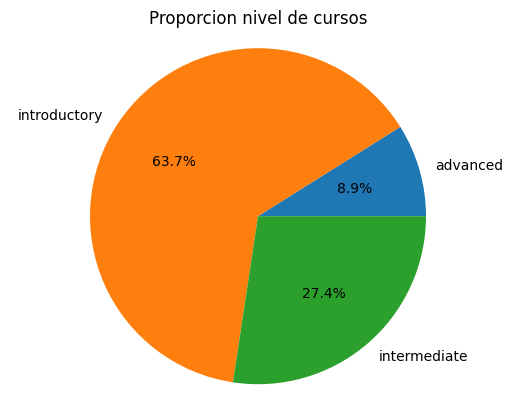

In [208]:
advanced = 87
introductory = 621
intermediate = 267
valores = [advanced,introductory,intermediate]
plt.pie(valores, labels =  ["advanced","introductory","intermediate"],autopct='%1.1f%%')
plt.axis("equal")
plt.title("Proporcion nivel de cursos")
plt.show()

Solo trataremos de ver el nivel del curso con los precios.

In [10]:
edx_level_price = edx[["Level","price"]]
edx_level_price

,Level,price
0,Introductory,FREE-Add a Verified Certificate for $49 USD
1,Introductory,FREE-Add a Verified Certificate for $49 USD
2,Introductory,FREE-Add a Verified Certificate for $90 USD
3,Intermediate,FREE-Add a Verified Certificate for $199 USD
4,Introductory,FREE-Add a Verified Certificate for $249 USD
...,...,...
970,Intermediate,FREE-Add a Verified Certificate for $25 USD
971,Introductory,FREE-Add a Verified Certificate for $139 USD
972,Advanced,FREE-Add a Verified Certificate for $139 USD
973,Introductory,FREE-Add a Verified Certificate for $25 USD


La biblioteca `re` de Python proporciona soporte para expresiones regulares, que son patrones de búsqueda y manejo de cadenas de texto.

In [13]:
#Usamos la biblioteca re para extrer los valores de los strings
edx_level_price["price_number"] = edx_level_price['price'].apply(lambda x: re.findall(r'\d+', x))

# Convertimos los números extraídos de texto a enteros
edx_level_price['price_number'] = edx_level_price['price_number'].apply(lambda x: int(x[0]) if len(x) > 0 else None)

edx_level_price

C:\Users\jere belen\AppData\Local\Temp\ipykernel_9328\913607774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_level_price["price_number"] = edx_level_price['price'].apply(lambda x: re.findall(r'\d+', x))
C:\Users\jere belen\AppData\Local\Temp\ipykernel_9328\913607774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_level_price['price_number'] = edx_level_price['price_number'].apply(lambda x: int(x[0]) if len(x) > 0 else None)


,Level,price,price_number
0,Introductory,FREE-Add a Verified Certificate for $49 USD,49
1,Introductory,FREE-Add a Verified Certificate for $49 USD,49
2,Introductory,FREE-Add a Verified Certificate for $90 USD,90
3,Intermediate,FREE-Add a Verified Certificate for $199 USD,199
4,Introductory,FREE-Add a Verified Certificate for $249 USD,249
...,...,...,...
970,Intermediate,FREE-Add a Verified Certificate for $25 USD,25
971,Introductory,FREE-Add a Verified Certificate for $139 USD,139
972,Advanced,FREE-Add a Verified Certificate for $139 USD,139
973,Introductory,FREE-Add a Verified Certificate for $25 USD,25


In [15]:
media_por_nivel = edx_level_price.groupby('Level')['price_number'].mean()
media_por_nivel

Level
Advanced        185.954023
Intermediate     99.599251
Introductory     88.850242
Name: price_number, dtype: float64

Rapidamente notamos que a mayor nivel mayor promedio de precio de los cursos,tambien recordemos que el 30% de los cursos de nivel avanzado son con clases en vivo.

### Subject

Variable cualitativa nominal

In [17]:
edx["subject"].head()

0    Education & Teacher Training
1                Computer Science
2                Computer Science
3      Data Analysis & Statistics
4                Computer Science
Name: subject, dtype: object

In [18]:
edx["subject"].isna().sum()

0

In [19]:
edx["subject"].value_counts()

subject
Computer Science                166
Business & Management           164
Data Analysis & Statistics       72
Humanities                       64
Engineering                      58
Social Sciences                  51
Economics & Finance              46
Communication                    39
Biology & Life Sciences          35
Language                         34
Math                             31
Medicine                         31
Education & Teacher Training     29
History                          20
Physics                          18
Environmental Studies            16
Art & Culture                    12
Health & Safety                  11
Law                              10
Science                          10
Design                            8
Energy & Earth Sciences           8
Electronics                       7
Music                             7
Food & Nutrition                  6
Philosophy & Ethics               6
Chemistry                         5
Architecture        

Rapidamente vemos que ciencia de datos y negocios son dos de las corrientes mas importante.Pero podemos ver la gran variedad de tematicas que tiene coursera.Al momento de hacer la nube de palabras con los titulos nos llamo la atencion las tematicas health y Language.

In [ ]:
edx[edx["subject"] == "Language"]

Solo logramos ver la gran cantidad de idiomas sobre los que tienen cursos,similar con health no logramos ver nada interesante,ahora veremos el promedio de cantidad de alumnos por subject y promedio de precios.

In [35]:
sumatoria_por_subject = edx.groupby('subject')['n_enrolled'].sum()
sumatoria_por_subject.sort_values(ascending = False)

subject
Computer Science                12447737
Business & Management            7076563
Communication                    4641327
Data Analysis & Statistics       4264412
Humanities                       3504140
Social Sciences                  1844379
Biology & Life Sciences          1763832
Engineering                      1396839
Language                         1063257
Medicine                          989765
Math                              963753
Economics & Finance               835907
Education & Teacher Training      706532
Physics                           580559
History                           530724
Architecture                      456611
Environmental Studies             368185
Health & Safety                   325912
Law                               291436
Art & Culture                     282312
Chemistry                         197535
Food & Nutrition                  197479
Literature                        191592
Science                           160697
Philosop

In [29]:
media_por_subject = edx.groupby('subject')['n_enrolled'].mean()
media_por_subject.sort_values(ascending = False)

subject
Communication                   119008.384615
Architecture                     91322.200000
Computer Science                 74986.367470
Data Analysis & Statistics       59227.944444
Humanities                       54752.187500
Biology & Life Sciences          50395.200000
Literature                       47898.000000
Business & Management            43149.774390
Chemistry                        39507.000000
Social Sciences                  36164.294118
Food & Nutrition                 32913.166667
Physics                          32253.277778
Medicine                         31927.903226
Language                         31272.264706
Math                             31088.806452
Health & Safety                  29628.363636
Law                              29143.600000
History                          26536.200000
Education & Teacher Training     24363.172414
Engineering                      24083.431034
Art & Culture                    23526.000000
Environmental Studies     

Uno de los objetivos principales del analisis es buscar oportunidades de negocios en un contexto altamente competitivo.Me parece interesante casos como Architecture,Literature,Chimestry Food and nutrition que aunque la cantidad de alumnos en terminos totales no son tan relevantes pero al haber poca oferta en comparacion con otras tematicas logran tener una media muy alta,mas adelante veremos estos casos para lograr encontrar informacion de valor

In [39]:
edx[edx["Level"] == "advanced"][edx["subject"] == "Food & Nutrition"]

C:\Users\jere belen\AppData\Local\Temp\ipykernel_9328\1297636064.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  edx[edx["Level"] == "advanced"][edx["subject"] == "Food & Nutrition"]


,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url


Tratamos de ver si sobre estas tematicas hay algun curso advanzado,que son los de mayor precio y vimos que no hay ni uno siendo esta una posible oportunidad ofrecer cursos avanzados para estas tematicas.

### Effort

Variable cualitativa que si se harian rangos mas amplios podria ser ordinal,pero vamos a generar una columna con el promedio del rango de cada fila

In [215]:
edx["course_effort"].head(100)

0        2–3 hours per week
1        2–4 hours per week
2       6–18 hours per week
3      10–15 hours per week
4        5–7 hours per week
               ...         
96      5–10 hours per week
97       2–4 hours per week
98     10–20 hours per week
99       2–4 hours per week
100      3–5 hours per week
Name: course_effort, Length: 100, dtype: object

In [216]:
edx["course_effort"].isna().sum()

0

Generamos una columna con el promedio del rango de horas de estudio recomendado por semana

In [217]:
# Utilizamos las expresiones regulares para extraer los números.Obtenemos una lista de string con los valores de los numeros
edx['horas'] = edx['course_effort'].apply(lambda x: re.findall(r'\d+', x))

# Calcular el promedio de los números extraídos
edx['horas_promedio'] = edx['horas'].apply(lambda x: sum(map(int, x)) / len(x) if len(x) > 0 else None)

edx["horas_promedio"]

0       2.5
1       3.0
2      12.0
3      12.5
4       6.0
       ... 
970     4.5
971     4.0
972     5.0
973     1.5
974     4.5
Name: horas_promedio, Length: 974, dtype: float64

Eliminamos las columnas course_effort y horas

In [218]:
edx.drop(columns=["horas","course_effort"], inplace = True)

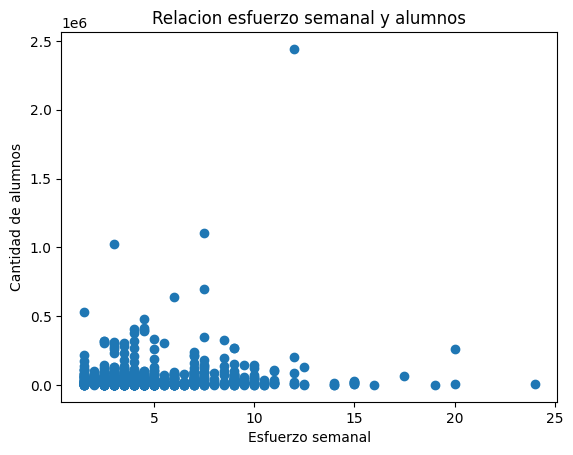

In [236]:
# Crea el diagrama de dispersión
plt.scatter(edx["horas_promedio"] , edx["n_enrolled"])

# Agrega etiquetas a los ejes
plt.xlabel('Esfuerzo semanal')
plt.ylabel('Cantidad de alumnos')

# Agrega un título al gráfico
plt.title('Relacion esfuerzo semanal y alumnos')

# Muestra el gráfico
plt.show()

### Course_length

In [220]:
edx["course_length"].head(5)

0     2 Weeks
1     7 Weeks
2    12 Weeks
3    13 Weeks
4     4 Weeks
Name: course_length, dtype: object

In [221]:
edx["course_length"].isna().sum()

0

In [222]:
edx['semanas'] = edx['course_length'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

In [223]:
print(edx["semanas"].min(),"-",edx["semanas"].max())

1 - 18


Generamos dos columnas una para esfuerzo total con el promedio de horas recomendadas y una como ingreso posible total con el precio del curso 

In [225]:
edx["esfuerzo_total"] = edx["horas_promedio"] * edx["semanas"]

In [ ]:
#Posteriormente haremos un analisis mas exhaustivo para los precios.
edx["price_number"] = edx['price'].apply(lambda x: re.findall(r'\d+', x))

# Convertimos los números extraídos de texto a enteros
edx['price_number'] = edx['price_number'].apply(lambda x: int(x[0]) if len(x) > 0 else None)
edx["price_number"]

In [231]:
edx["ingreso_posible_total"] = edx["n_enrolled"] * edx["price_number"]

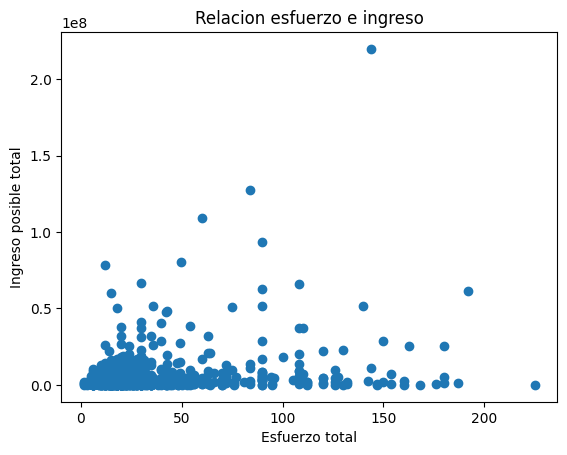

In [232]:
# Crea el diagrama de dispersión
plt.scatter(edx["esfuerzo_total"] , edx["ingreso_posible_total"])

# Agrega etiquetas a los ejes
plt.xlabel('Esfuerzo total')
plt.ylabel('Ingreso posible total')

# Agrega un título al gráfico
plt.title('Relacion esfuerzo e ingreso')

# Muestra el gráfico
plt.show()

Podemos notar primero el gran aglutinamiento de valores en el area de esfuerzo entre 0 y 50,podemos ver que cuando el esfuerzo aumenta es decir que se demanda mas tiempo total a los alumnos no suele aumentar el ingreso total posible

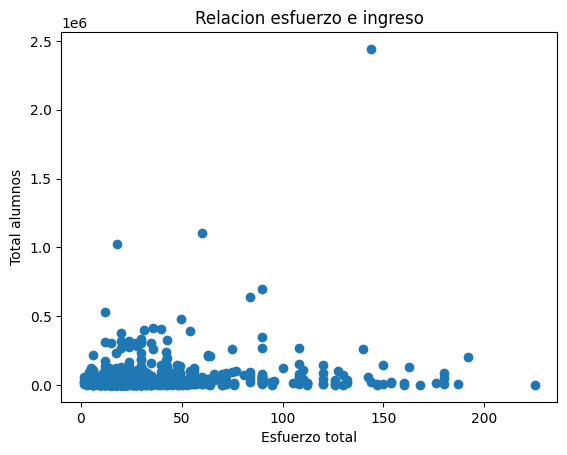

In [234]:
# Crea el diagrama de dispersión
plt.scatter(edx["esfuerzo_total"] , edx["n_enrolled"])

# Agrega etiquetas a los ejes
plt.xlabel('Esfuerzo total')
plt.ylabel('Total alumnos')

# Agrega un título al gráfico
plt.title('Relacion esfuerzo e ingreso')

# Muestra el gráfico
plt.show()

Si sacamos el factor del precio notamos la misma tendencia a un comportamiento plano,similar tambien para el analisis de horas propuestas por semana,por lo que en la propuesta no pesa la cantidad de esfuerzo sugerido como factor relevante

### Language y Subtitles

Variable cualitativa nominal.Al comienzo logramos notar que habia varias palabras en español en los titulos gracias a las nubes de palabras asi que vamos a ir directamente a ese punto.

In [63]:
edx["language"]

0      English
1      English
2      English
3      English
4      English
        ...   
970    English
971         中文
972    English
973    English
974    English
Name: language, Length: 975, dtype: object

In [64]:
edx["language"].isna().sum()

0

In [65]:
edx["language"].value_counts()

language
English          777
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: count, dtype: int64

Efectivamente vemos que hay 176 cursos en español

In [67]:
edx["subtitles"].head(5)

0    English
1    English
2    English
3    English
4    English
Name: subtitles, dtype: object

In [68]:
edx["subtitles"].isna().sum()

3

In [69]:
edx["subtitles"].value_counts()

subtitles
English                                                                            713
Español                                                                            157
English, 中文                                                                         21
English, Español                                                                    21
English, हिन्दी                                                                     10
Français                                                                             7
English, Русский                                                                     5
Italiano                                                                             4
Português                                                                            4
English, 中文, 中文                                                                      3
English, 日本語                                                                         3
English, Français                

In [267]:
edx[edx["subtitles"].fillna("").apply(lambda x:"Português" in x)].shape[0]

11

In [269]:
edx[edx["subtitles"].fillna("").apply(lambda x:"Português" in x)]["n_enrolled"].sum()

1016006

Probablemente cuando pensamos en portugues pensamos en el mercado "brasileiro" una de las economias mas importantes del mundo,pero ademas varios paises tienen habla en portugues,siendo un mercado de mas de 200 millones de personas.

In [80]:
edx[edx["subtitles"].fillna("").apply(lambda x:"Español" in x)].shape[0]

189

In [76]:
edx[edx["language"] == "Español"]["subtitles"].value_counts()

subtitles
Español                        157
English, Español                13
English                          4
Español, Español                 1
English, Español, Português      1
Name: count, dtype: int64

Notamos que los cursos que tienen subtitulos en Español y no son en idioma español solo son 189-176=13

Queremos ver que instituciones imparten cursos en español

In [125]:
edx[edx["language"] == "Español"]["institution"].value_counts()

institution
Universitat Politècnica de Valencia             36
Inter-American Development Bank                 19
Universidad Autónoma de Madrid                  17
Universidades Anáhuac                           15
Tecnológico de Monterrey                        15
Universidad Nacional de Córdoba                 12
Universidad Galileo                             12
Pontificia Universidad Javeriana                10
IBM                                              9
Universidad del Rosario                          8
Universidad Carlos III de Madrid                 6
Berklee College of Music                         4
LOGYCA                                           4
The University of Michigan                       3
edX                                              1
Università degli Studi di Napoli Federico II     1
Delft University of Technology                   1
Amnesty International                            1
NYIF                                             1
Catalyst           

Vemos que en gran parte de los instituos son españoles excepto algunos.Destaca Inter-American Development Bank ,ibm y Michigan

In [134]:
edx[edx["institution"] == "IBM"][edx["language"] == "Español"].head(2)

C:\Users\jere belen\AppData\Local\Temp\ipykernel_9328\2098572267.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  edx[edx["institution"] == "IBM"][edx["language"] == "Español"].head(2)


,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_length,price,course_description,course_syllabus,course_url,horas_promedio,semanas
204,Inteligencia Artificial para todos: Domina los...,Aprende qué es la Inteligencia Artificial (IA)...,11764,Self-paced on your time,IBM,Rav Ahuja,Introductory,Computer Science,Español,Español,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"En este curso, aprenderás qué es la Inteligenc...",NaN,https://www.edx.org/course/inteligencia-artifi...,1.5,4
332,Introducción a la ciencia de datos y sus aplic...,El arte de descubrir las percepciones y tenden...,7303,Self-paced on your time,IBM,Alex Aklson,Introductory,Data Analysis & Statistics,Español,Español,6 Weeks,FREE-Add a Verified Certificate for $39 USD,Los antiguos egipcios aplicaron datos del cens...,NaN,https://www.edx.org/course/Introduccion-a-la-c...,4.5,6


No encontramos nada relevante sobre los institutos que imparten en español

In [82]:
edx[edx["subtitles"].fillna("").apply(lambda x:"Español" in x)]["n_enrolled"].sum()

5470091

Architecture,Literature,Chimestry Food and nutrition

In [97]:
edx[edx["language"] == "Español"]["subject"].value_counts()

subject
Computer Science                28
Business & Management           25
Data Analysis & Statistics      19
Economics & Finance             14
Social Sciences                 10
Engineering                     10
Education & Teacher Training     8
Communication                    8
Music                            5
Math                             5
Humanities                       5
Biology & Life Sciences          5
Science                          4
Health & Safety                  4
Medicine                         3
Language                         3
Art & Culture                    3
Chemistry                        3
Electronics                      2
Environmental Studies            2
Law                              2
Physics                          2
Philosophy & Ethics              2
History                          2
Design                           1
Food & Nutrition                 1
Name: count, dtype: int64

In [86]:
edx[edx["language"] == "Español"][edx["subject"] == "Food & Nutrition"]

C:\Users\jere belen\AppData\Local\Temp\ipykernel_9328\2431228667.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  edx[edx["language"] == "Español"][edx["subject"] == "Food & Nutrition"]


,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_length,price,course_description,course_syllabus,course_url,horas_promedio
172,FlashDiet: Aprende a comer sano,En este curso aprenderás las bases de la nutri...,48105,Self-paced on your time,Universitat Politècnica de Valencia,Purificación García Segovia-Mª Jesús Pagán Mor...,Introductory,Food & Nutrition,Español,Español,5 Weeks,FREE-Add a Verified Certificate for $50 USD,Centenares de estudios científicos corroboran ...,NaN,https://www.edx.org/course/flashdiet-aprende-a...,2.5


In [87]:
edx[edx["language"] == "Español"][edx["subject"] == "Architecture"]

C:\Users\jere belen\AppData\Local\Temp\ipykernel_9328\777345297.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  edx[edx["language"] == "Español"][edx["subject"] == "Architecture"]


,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_length,price,course_description,course_syllabus,course_url,horas_promedio


In [88]:
edx[edx["language"] == "Español"][edx["subject"] == "Literature"]

C:\Users\jere belen\AppData\Local\Temp\ipykernel_9328\2256242029.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  edx[edx["language"] == "Español"][edx["subject"] == "Literature"]


,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_length,price,course_description,course_syllabus,course_url,horas_promedio


Vemos que en estas areas de estudio,hay pocos cursos que estan en español y todos son en nivel introductorio siendo un grupo de areas especificas en cual seguir indagando.

### Por ultimo vamos hacer algunos analisis por la columna Price

Vamos a convertir la variable a cuantitativa para poder trabajarla.

In [229]:
edx["price"].apply(lambda x: "FREE" in x).value_counts()

price
True    974
Name: count, dtype: int64

Vemos que todos los cursos son gratis con opcion de compra de certificado,separamos el precio para ver cuales son los mas frecuentes y vamos hacer un grafico de puntos para ver si se comporta como una curva de demanda tipica.

In [230]:
edx["price_number"] = edx['price'].apply(lambda x: re.findall(r'\d+', x))

# Convertimos los números extraídos de texto a enteros
edx['price_number'] = edx['price_number'].apply(lambda x: int(x[0]) if len(x) > 0 else None)
edx["price_number"]

0       49
1       49
2       90
3      199
4      249
      ... 
970     25
971    139
972    139
973     25
974     79
Name: price_number, Length: 974, dtype: int64

In [107]:
edx["price_number"].value_counts().head(5)

price_number
49     275
99     136
50      96
199     85
149     78
Name: count, dtype: int64

In [108]:
edx[edx["price_number"]>70].head(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,price_number
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,90
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge,199
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...,249
5,Introduction to Project Management,Learn the principles of project management and...,301793,Self-paced on your time,University of Adelaide,Frank Schultmann-Noel Lindsay-Anton Jordaan-Jo...,Introductory,Business & Management,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $199 USD,Project management is an essential skill-set f...,NaN,https://www.edx.org/course/introduction-to-pro...,199
7,The Foundations of Happiness at Work,Learn why happiness at work matters and how to...,67073,Self-paced on your time,"University of California, Berkeley",Dacher Keltner-Emiliana Simon-Thomas,Introductory,Business & Management,English,English,2–3 hours per week,4 Weeks,FREE-Add a Verified Certificate for $199 USD,This course explains what happiness at work lo...,NaN,https://www.edx.org/course/the-foundations-of-...,199


In [109]:
edx[edx["price_number"]<70]["subject"].value_counts()

subject
Computer Science                52
Business & Management           46
Data Analysis & Statistics      44
Humanities                      43
Social Sciences                 36
Economics & Finance             33
Engineering                     27
Communication                   21
Math                            19
Language                        18
Education & Teacher Training    18
Biology & Life Sciences         15
Physics                         13
Medicine                        12
Environmental Studies           11
History                         11
Health & Safety                  8
Science                          8
Music                            5
Art & Culture                    5
Law                              4
Chemistry                        4
Food & Nutrition                 4
Architecture                     4
Philosophy & Ethics              4
Design                           3
Electronics                      3
Energy & Earth Sciences          2
Ethics      

In [110]:
edx[edx["price_number"]<70]["Level"].value_counts()

Level
Introductory    336
Intermediate    129
Advanced         10
Name: count, dtype: int64

In [111]:
print(edx["price_number"].max(),"-",edx["price_number"].min())

450 - 5


Podemos ver los valores que toman la mayoria de los cursos.Aunque los cursos en principio son gratis con opcion de pago para obtener certificado generaremos una nube de puntos para intentar identificar alguna tendencia entre precio y cantidad de matriculados.Como la nube de puntos no nos brindaba informacion grafica util vamos a crear intervalos.Luego vamos a generar una curva con la suma de alumnos por intervalo de cursos.Aunque como ya sabemos la cantidad de cursos de precios mas bajos es mayor lo que  buscamos identificar es el comportamiento en terminos absolutos de de la demanda general en cada segmento

In [112]:
# Definir los límites de los intervalos
bins = [0,50,100,150,200,250,300,450]

# Generar los intervalos para la columna 'Valores'
edx['Intervalos'] = pd.cut(edx['price_number'], bins)

In [113]:
edx['Intervalos'].value_counts()

Intervalos
(0, 50]       462
(50, 100]     185
(100, 150]    161
(150, 200]    109
(200, 250]     35
(250, 300]     14
(300, 450]      8
Name: count, dtype: int64

In [114]:
suma_por_intervalo =edx.groupby("Intervalos")["n_enrolled"].sum()
suma_por_intervalo

Intervalos
(0, 50]       15840330
(50, 100]     14509631
(100, 150]     6445858
(150, 200]     5717192
(200, 250]     1742492
(250, 300]      558974
(300, 450]      625832
Name: n_enrolled, dtype: int32

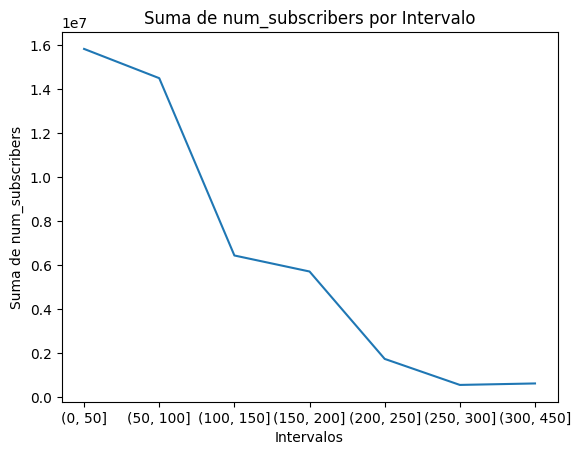

In [115]:
suma_por_intervalo =edx.groupby("Intervalos")["n_enrolled"].sum()
# Generar el gráfico de barras
suma_por_intervalo.plot(kind='line')

# Configurar etiquetas y título del gráfico
plt.xlabel('Intervalos')
plt.ylabel('Suma de num_subscribers')
plt.title('Suma de num_subscribers por Intervalo')

# Mostrar el gráfico
plt.show()

Aunque los cursos de edx, son gratuitos y estan disponibles para cualquier persona que desee inscribirse.Vemos que el comportamiento es muy similar a una curva de demanda tipica donde a mayor precio menor cantidad de alumnos interesados en los cursos.

En general la tasa de conversion para la finalizacion del curso oscila entre un 5% y un 15% de ese estimado habria que generar otro filtro para los que pagarian por obtener el certificado.No pudimos encontrar datos mas precisos para mejorar el analisis por lo que avanzaremos al dataset de udemy donde tal vez encontremos otra informacion valiosa.



Luego de ver el comportamiento de la curva generada en udemy donde se disparaba la demanda para el segmento de 150-200 nos intereso volver a este punto para averiguar como se comporta la curva de edx en terminos relativos con la cantidad de cursos del segmento(media).

In [116]:
promedio_por_intervalo =edx.groupby("Intervalos")["n_enrolled"].mean()
promedio_por_intervalo

Intervalos
(0, 50]       34286.428571
(50, 100]     78430.437838
(100, 150]    40036.385093
(150, 200]    52451.302752
(200, 250]    49785.485714
(250, 300]    39926.714286
(300, 450]    78229.000000
Name: n_enrolled, dtype: float64

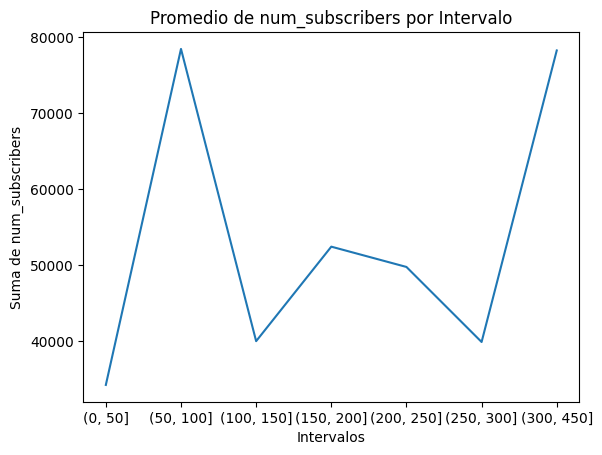

In [117]:
promedio_por_intervalo =edx.groupby("Intervalos")["n_enrolled"].mean()
# Generar el gráfico de barras
promedio_por_intervalo.plot(kind='line')

# Configurar etiquetas y título del gráfico
plt.xlabel('Intervalos')
plt.ylabel('Suma de num_subscribers')
plt.title('Promedio de num_subscribers por Intervalo')

# Mostrar el gráfico
plt.show()

Notamos que no solo crece el segmento de 150-200,si no que en terminos medio el segmento mas caro de 300-450 vuelve a ser altamente demandado.

In [118]:
edx[edx["price_number"]>300]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,price_number,Intervalos
19,Strategic Social Media Marketing,Learn how to drive social media engagement by ...,103640,Instructor-led on a course schedule,Boston University,Barbara Bickart,Advanced,Business & Management,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $399 USD,Social media technologies are continuously tra...,Week 1: A Strategic Perspective on Social Medi...,https://www.edx.org/course/strategic-social-me...,399,"(300, 450]"
134,Python for Data Science,"Learn to use powerful, open-source, Python too...",266978,Self-paced on your time,"The University of California, San Diego",Ilkay Altintas-Leo Porter,Advanced,Data Analysis & Statistics,English,English,8–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $350 USD,"In the information age, data is all around us....",NaN,https://www.edx.org/course/python-for-data-sci...,350,"(300, 450]"
157,Foundations of Modern Finance I,A mathematically rigorous framework to underst...,24108,Instructor-led on a course schedule,Massachusetts Institute of Technology,Leonid Kogan-Jiang Wang-Egor Matveyev,Advanced,Economics & Finance,English,English,10–14 hours per week,12 Weeks,FREE-Add a Verified Certificate for $450 USD,"This is a two-part course, and part of the Mic...",NaN,https://www.edx.org/course/foundations-of-mode...,450,"(300, 450]"
163,Probability and Statistics in Data Science usi...,"Using Python, learn statistical and probabilis...",106286,Self-paced on your time,"The University of California, San Diego",Alon Orlitsky-Yoav Freund,Advanced,Data Analysis & Statistics,English,English,10–12 hours per week,10 Weeks,FREE-Add a Verified Certificate for $350 USD,The job of a data scientist is to glean knowle...,NaN,https://www.edx.org/course/probability-and-sta...,350,"(300, 450]"
308,Machine Learning Fundamentals,Understand machine learning's role in data-dri...,82008,Self-paced on your time,"The University of California, San Diego",Sanjoy Dasgupta,Advanced,Data Analysis & Statistics,English,English,8–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $350 USD,Do you want to build systems that learn from e...,NaN,https://www.edx.org/course/machine-learning-fu...,350,"(300, 450]"
543,Information Technology Foundations,Information Technology Foundations examines IT...,6388,Self-paced on your time,Western Governors University,Gerri Light-Ryan Whisler,Introductory,Computer Science,English,English,9–10 hours per week,6 Weeks,FREE-Add a Verified Certificate for $399.60 USD,Information technology (IT) can be viewed as a...,NaN,https://www.edx.org/course/information-technol...,399,"(300, 450]"
594,Energy Principles and Renewable Energy,"An introduction to the language of energy, key...",19520,Instructor-led on a course schedule,The University of Queensland,Simon Smart,Advanced,Energy & Earth Sciences,English,English,10–12 hours per week,14 Weeks,FREE-Add a Verified Certificate for $375 USD,This course addresses the important global iss...,Background:Energy Literacy\nAn introduction to...,https://www.edx.org/course/energy-principles-a...,375,"(300, 450]"
842,Driving Digital Innovation through Experimenta...,Learn how to apply principles of experimentati...,16904,Instructor-led on a course schedule,Boston University,Paul R. Carlile-Ben Lubin,Advanced,Computer Science,English,English,3–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $399 USD,Experimentation is a key capability for any bu...,NaN,https://www.edx.org/course/driving-digital-inn...,399,"(300, 450]"


Vemos que gran parte se debe a los pocos cursos que se imparten en este segmento de precio,pero volvemos a notar que estos son los cursos avanzados de los cuales la mitad son con instructor.

Encontramos en un informe por los 10 años de edx,datos para obtener la conversion de compra de certificados,el dato es global e historico y es de  aproximadamente de 2%.El dato no es lo suficientemente valioso para volver a generar el analisis,lo utilizaremos para dimensionar el posible mercado de las tematicas que venimos viendo interesantes en español.Fuente de informacion,cuenta con el total de inscriptos en los 10 años y el total de certificados emitidos en el mismo periodo.
https://assets.ctfassets.net/ii9ehdcj88bc/1qW4lgaKAZhztgUcQOV8QZ/d842df2f2ca3d9e2b83eecdfce925db5/2021-edx-impact_report-spanish.pdf

In [151]:
# Lista de subject
palabras = ['Architecture','Literature',"Food & Nutrition"]

# Creamos una máscara para filtrar las filas que contienen alguna de las palabras en la columna "texto"
mascara = edx['subject'].str.contains('|'.join(palabras), case=False)

# Filtramos el DataFrame utilizando la máscara
data_filtrada = edx[mascara]

In [153]:
data_filtrada
data_filtrada["price_number"] = data_filtrada['price'].apply(lambda x: re.findall(r'\d+', x))
data_filtrada['price_number'] = data_filtrada['price_number'].apply(lambda x: int(x[0]) if len(x) > 0 else None)


C:\Users\jere belen\AppData\Local\Temp\ipykernel_17380\618886793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada["price_number"] = data_filtrada['price'].apply(lambda x: re.findall(r'\d+', x))
C:\Users\jere belen\AppData\Local\Temp\ipykernel_17380\618886793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['price_number'] = data_filtrada['price_number'].apply(lambda x: int(x[0]) if len(x) > 0 else None)


In [155]:
dos_por_ciento = data_filtrada['n_enrolled'] * 0.02

# Multiplica la columna1 por la columna2
resultado = dos_por_ciento * data_filtrada['price_number']
resultado.sum()

1573894.1400000001

Teniendo en cuenta que el objetivo de la startup es ser competitiva en un rubro altamente competitivo gracias a su eficiencia,creo que tener pocos cursos con tematicas especializadas para un sector sin cubrir ofrece la oportunidad de ser rentable rapidamente.

### UDEMY

In [157]:
udemy = pd.read_csv("udemy_courses.csv")

In [168]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Vemos que tenemos una columna is_paid con valores True ademas tenemos precios y cantidad de suscriptores esto nos va a servir para solventar los analisis que no pudimos hacer previamente con los otros datasets por falta de datos

In [211]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3672 non-null   int64              
 1   course_title         3672 non-null   object             
 2   url                  3672 non-null   object             
 3   is_paid              3672 non-null   bool               
 4   price                3672 non-null   int64              
 5   num_subscribers      3672 non-null   int64              
 6   num_reviews          3672 non-null   int64              
 7   num_lectures         3672 non-null   int64              
 8   level                3672 non-null   object             
 9   content_duration     3672 non-null   float64            
 10  published_timestamp  3672 non-null   datetime64[ns, UTC]
 11  subject              3672 non-null   object             
dtypes: bool(1), datetime64[ns

Vemos que no tenemos valores nulos.

In [85]:
udemy[udemy.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Intervalos
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance,"(0, 50]"
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance,"(0, 50]"
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance,"(0, 50]"
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance,"(0, 50]"
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design,"(0, 50]"
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development,"(50, 100]"


In [165]:
udemy.drop_duplicates(inplace = True)

### Title

Generamos nuevamente una nube de palabras.

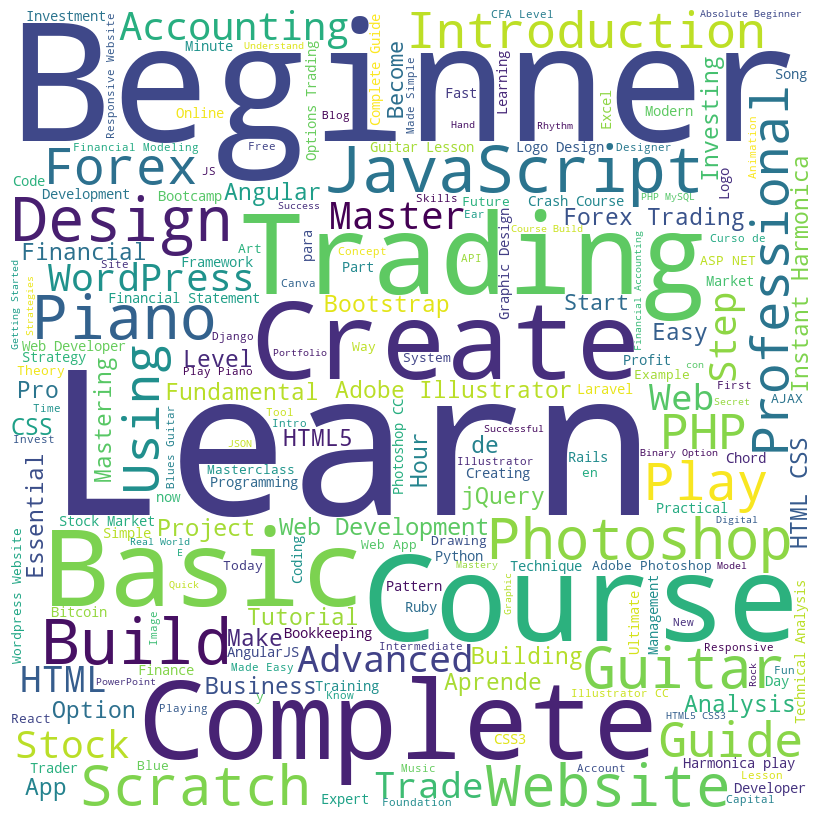

In [200]:
texto = ''
for row in udemy['course_title']:
    texto += row + ' '
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(texto)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Notamos facilmente la difrencia con coursera y edx con mucha menos variedad,donde no vemos presencia ni de analisis de datos python o palabras en español.

### Is_Paid

Variable cualitativa categorica.

In [175]:
udemy["is_paid"].head(5)

0    True
1    True
2    True
3    True
4    True
Name: is_paid, dtype: bool

In [174]:
udemy["is_paid"].value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

### Price

Variable cuantitativa discreta.

In [87]:
udemy["price"].head(5)

0    200
1     75
2     45
3     95
4    200
Name: price, dtype: int64

In [177]:
print(udemy["price"].min(),"-",udemy["price"].max())

0 - 200


In [180]:
udemy[udemy["price"] == 0].shape[0]

310

Los cursos que no tienen precio corresponden a los gratuitos.

Generamos un boxplot para ver la distribucion de los valores

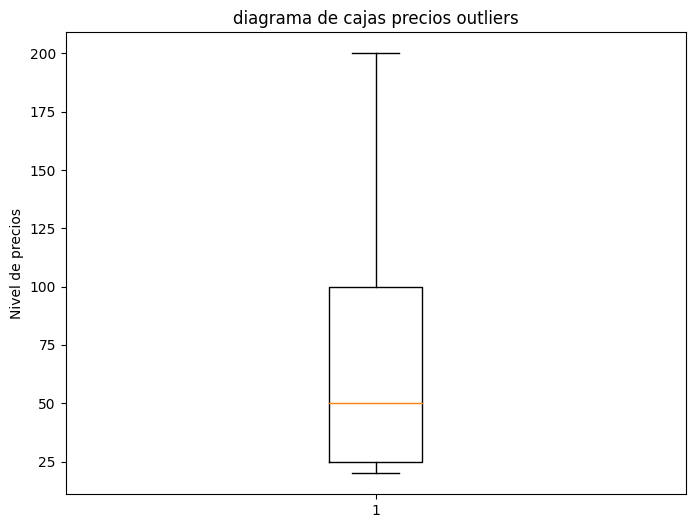

In [210]:
plt.figure(figsize=(8, 6))
plt.boxplot(udemy[udemy["price"] != 0]["price"])
plt.ylabel('Nivel de precios')
plt.title("diagrama de cajas precios outliers")
plt.show()

Vemos que no hay valores atipicos y los valores tienen una mediana de 50

Vamos a generar intervalor y vamos a volver a generar el grafico con la frecuencia.Para esto usamos la funcion cut.

In [47]:
# Definir los límites de los intervalos
bins = [0, 50, 100,150,200]

# Generar los intervalos para la columna 'Valores'
udemy['Intervalos'] = pd.cut(udemy['price'], bins)

In [48]:
suma_por_intervalo = udemy.groupby("Intervalos")["num_subscribers"].sum()

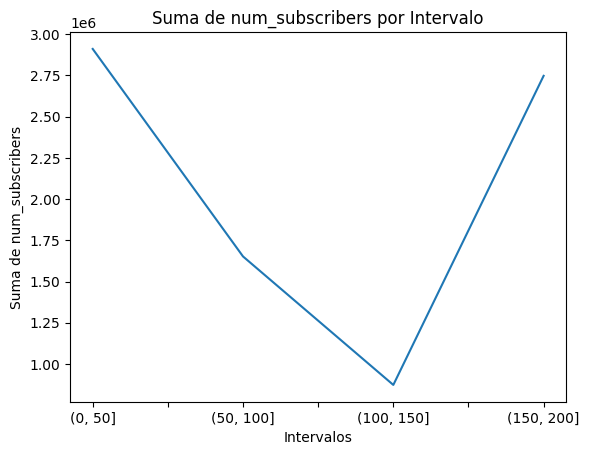

In [50]:
# Generar el gráfico de barras
suma_por_intervalo.plot(kind='line')

# Configurar etiquetas y título del gráfico
plt.xlabel('Intervalos')
plt.ylabel('Suma de num_subscribers')
plt.title('Suma de num_subscribers por Intervalo')

# Mostrar el gráfico
plt.show()

Al comienzo vemos que se comporta como una curva de demanda pero al llegar al utlimo intervalo de 150 a 200 vemos que la cantidad de  alumnos crece en gran cantidad algo totalmente distinto que el analisis con edx.Por lo que estos son cursos realmente rentable por la cantidad de alumnos y su precio.

In [193]:
udemy[udemy["price"]>150]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Intervalos
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,"(150, 200]"
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,"(150, 200]"
8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,True,195,5172,34,38,Expert Level,2.5,2015-05-28T00:14:03Z,Business Finance,"(150, 200]"
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1.0,2017-04-18T18:13:32Z,Business Finance,"(150, 200]"
10,592338,Forex Trading Secrets of the Pros With Amazon'...,https://www.udemy.com/trading-with-amazons-aws...,True,200,4284,93,76,All Levels,5.0,2015-09-11T16:47:02Z,Business Finance,"(150, 200]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,1227578,Learning Path: The Road to Elasticsearch,https://www.udemy.com/learning-path-the-road-t...,True,200,50,5,60,Beginner Level,5.0,2017-05-29T17:56:24Z,Web Development,"(150, 200]"
3642,709324,Learn Web Development by Creating a Social Net...,https://www.udemy.com/meteor-tutorial/,True,200,442,48,80,Beginner Level,6.5,2015-12-30T16:53:44Z,Web Development,"(150, 200]"
3647,975916,17 Complete JavaScript projects explained st...,https://www.udemy.com/17-complete-javascript-p...,True,185,327,26,106,Beginner Level,9.5,2016-10-26T14:03:38Z,Web Development,"(150, 200]"
3652,919354,Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...,https://www.udemy.com/learn-bootstrap-4-the-mo...,True,200,279,37,119,All Levels,10.0,2017-04-25T00:57:35Z,Web Development,"(150, 200]"


In [196]:
udemy[udemy["price"]>150]["subject"].value_counts()

subject
Web Development        209
Business Finance       185
Graphic Design          62
Musical Instruments     29
Name: count, dtype: int64

In [197]:
udemy["subject"].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

In [58]:
udemy[udemy["price"]>150][udemy["level"] == "All Levels"]["subject"].value_counts()

C:\Users\jere belen\AppData\Local\Temp\ipykernel_1312\1945292974.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  udemy[udemy["price"]>150][udemy["level"] == "All Levels"]["subject"].value_counts()


subject
Business Finance       129
Web Development        125
Graphic Design          37
Musical Instruments     17
Name: count, dtype: int64

In [201]:
udemy[udemy["price"]>150][udemy["level"] == "Beginner Level"]["subject"].value_counts()

C:\Users\jere belen\AppData\Local\Temp\ipykernel_9328\1820420654.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  udemy[udemy["price"]>150][udemy["level"] == "Beginner Level"]["subject"].value_counts()


subject
Web Development        63
Business Finance       32
Graphic Design         21
Musical Instruments     7
Name: count, dtype: int64

In [202]:
udemy[udemy["price"]>150][udemy["level"] == "Intermediate Level"]["subject"].value_counts()

C:\Users\jere belen\AppData\Local\Temp\ipykernel_9328\1670103469.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  udemy[udemy["price"]>150][udemy["level"] == "Intermediate Level"]["subject"].value_counts()


subject
Web Development        18
Business Finance       15
Musical Instruments     5
Graphic Design          4
Name: count, dtype: int64

In [203]:
udemy[udemy["price"]>150][udemy["level"] == "Expert Level"]["subject"].value_counts()

C:\Users\jere belen\AppData\Local\Temp\ipykernel_9328\2320330585.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  udemy[udemy["price"]>150][udemy["level"] == "Expert Level"]["subject"].value_counts()


subject
Business Finance    9
Web Development     3
Name: count, dtype: int64

Vemos que los cursos de negocios y finanzas son los mas importante en la categoria de nivel experto para este rango de precios.Cambia para la categoria beginner donde web development es la categoria mas importante.

precio, idioma, nivel y rating de cada curso, con el objetivo de analizar qué tanto influyen dichas variables en la demanda del producto vendido.

In [167]:
udemy[udemy.duplicated(subset="course_title",keep=False)].head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1301,692920,Creating an animated greeting card via Google ...,https://www.udemy.com/creating-an-animated-gre...,True,20,1504,10,9,Beginner Level,1.5,2016-01-05T20:31:49Z,Graphic Design
1334,699376,Creating an animated greeting card via Google ...,https://www.udemy.com/creating-an-animated-gre...,True,20,549,10,8,Beginner Level,1.0,2016-04-12T01:24:14Z,Graphic Design
1447,699380,Creating an animated greeting card via Google ...,https://www.udemy.com/creating-an-animated-gre...,True,20,770,8,8,Intermediate Level,1.0,2016-05-06T15:54:32Z,Graphic Design
2062,99324,Acoustic Blues Guitar Lessons,https://www.udemy.com/finger-picking-blues-gui...,False,0,8217,109,10,Intermediate Level,1.0,2013-09-30T20:45:20Z,Musical Instruments
2067,112314,Acoustic Blues Guitar Lessons,https://www.udemy.com/jim-bruce-blues-guitar-l...,True,125,1284,136,40,Intermediate Level,12.5,2013-11-28T08:54:00Z,Musical Instruments


In [65]:
udemy[udemy["course_title"] == "Acoustic Blues Guitar Lessons"]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Intervalos
2062,99324,Acoustic Blues Guitar Lessons,https://www.udemy.com/finger-picking-blues-gui...,False,0,8217,109,10,Intermediate Level,1.0,2013-09-30T20:45:20Z,Musical Instruments,NaN
2067,112314,Acoustic Blues Guitar Lessons,https://www.udemy.com/jim-bruce-blues-guitar-l...,True,125,1284,136,40,Intermediate Level,12.5,2013-11-28T08:54:00Z,Musical Instruments,"(100.0, 150.0]"
2158,647276,Acoustic Blues Guitar Lessons,https://www.udemy.com/acoustic-blues-guitar-le...,True,75,189,18,101,Intermediate Level,4.5,2016-01-10T21:39:42Z,Musical Instruments,"(50.0, 100.0]"


In [209]:
1284/8217

0.15626140927345747

Logramos encontrar un punto fundamental para el analisis,la estrategia de udemy para captacion de cliente a traves de cursos gratis de poca duracion seguidos por el curso pago con mayor duracion,tambien podemos ver la cercania de fechas,el curso gratis se lanzo en septiembre de 2013 y el pago dos meses despues del mismo año.Este punto sera fundamental,porque aunque no podemos trazar los usarios garantizando que los mismos que pagaron participaron del gratuito podemos utilizar estos datos para generar un kpi aproximado de conversion.

In [168]:
cursos_gratuitos = udemy[udemy["is_paid"] == False]
cursos_gratuitos = cursos_gratuitos.drop_duplicates()

Tenemos los cursos gratuitos,ahora intentaremos identificar cuales son los cursos que los clientes deberian comparar para seguir con la linea de aprendizaje.Lo vamos a intentar hacer a traves de una serie de filtros.Convertimos la columna de "	published_timestamp	" a fecha para poder usarlo como uno de los filtros ya que el curso gratuito tiene que ser antes y relativamente cercano al curso que se sugiere comprar.

In [169]:
# Convertir columna a formato datetime
udemy['published_timestamp'] = pd.to_datetime(udemy['published_timestamp'])

In [170]:
cursos_gratuitos['published_timestamp'] = pd.to_datetime(cursos_gratuitos['published_timestamp'])

In [104]:
type(udemy['published_timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [171]:
registros_posibles = []  # Lista para almacenar los posibles cursos para cada registro gratuito

for _, curso_gratuito in cursos_gratuitos.iterrows():
    subject = curso_gratuito['subject']
    fecha_publicacion = curso_gratuito['published_timestamp']
    subscriptores_gratuito = curso_gratuito['num_subscribers']
    indice_curso_gratuito = curso_gratuito.name  # Guardar el índice del curso gratuito
    tiempo = curso_gratuito['content_duration']

    # Crear un DataFrame que contiene solo el curso gratuito
    df_curso_gratuito = pd.DataFrame(curso_gratuito).transpose()

    # Aplicar filtros para encontrar los posibles cursos
    posibles_cursos = udemy[
        (udemy['subject'] == subject) &
        (udemy['price'] != 0) &
        (udemy['published_timestamp'] > fecha_publicacion) &
        (udemy['published_timestamp'] <= fecha_publicacion + pd.DateOffset(months=2)) &
        (udemy['num_subscribers'] < subscriptores_gratuito) &
        (abs(udemy.index.to_series() - indice_curso_gratuito) <= 20) &
        (udemy['content_duration'] > tiempo) # Filtrar dentro de 10 posiciones del índice del curso gratuito
    ]

    # Agregar los posibles cursos al DataFrame de posibles cursos
    df_posibles_cursos = pd.concat([df_curso_gratuito, posibles_cursos])

    # Agregar el DataFrame de posibles cursos a la lista de registros_posibles
    registros_posibles.append(df_posibles_cursos)

# Combinar los DataFrames de posibles cursos en uno solo y restablecer el índice
df_posibles_cursos = pd.concat(registros_posibles).reset_index(drop=True)

In [208]:
df_posibles_cursos.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,Beginner Level,0.55,2017-03-23 22:19:57+00:00,Business Finance
1,1217064,How To Invest With Tiny Capital In Stocks ?,https://www.udemy.com/howtoinvest5k/,True,20,1239,5,6,Beginner Level,0.7,2017-05-23 16:07:09+00:00,Business Finance
2,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,0,50855,2698,15,Beginner Level,1.5,2013-12-25 19:53:34+00:00,Business Finance
3,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,False,0,17160,620,23,All Levels,1.0,2014-08-29 20:10:38+00:00,Business Finance
4,923616,Website Investing 101 - Buying & Selling Onlin...,https://www.udemy.com/cash-flow-website-invest...,False,0,6811,151,51,All Levels,2.0,2016-08-05 17:03:15+00:00,Business Finance


In [187]:
udemy[udemy["course_title"] == "Creating Interactive HTML5 Video"]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3556,869448,Creating Interactive HTML5 Video,https://www.udemy.com/creating-interactive-htm...,True,25,838,13,23,Intermediate Level,2.0,2016-06-06 15:24:53+00:00,Web Development


In [206]:
int(udemy[udemy["course_title"] == "Creating Interactive HTML5 Video"]["num_subscribers"])/int(udemy[udemy["course_title"] == "Learn HTML in 2 hours!"]["num_subscribers"])

C:\Users\jere belen\AppData\Local\Temp\ipykernel_17380\3259671544.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(udemy[udemy["course_title"] == "Creating Interactive HTML5 Video"]["num_subscribers"])/int(udemy[udemy["course_title"] == "Learn HTML in 2 hours!"]["num_subscribers"])


0.15660624182395813

Buscamos en base al dataframe posibles secuencias de cursos gratuitos y pagos con posibles similitud y la tasa nos siguio dando aproximadamente 15%.Esto quiere decir que hay posibilidades de que cada 100 personas que realizan un curso gratuito 15 compran un curso de pago.

Ahora vamos a sacar el indice general de personas que consumieron un curso gratuito por personas que consumieron de pago.

In [214]:
(udemy[udemy["is_paid"] == True]["num_subscribers"].sum()/udemy[udemy["is_paid"] == False]["num_subscribers"].sum())*100

227.66754532551167

In [238]:
udemy["ingreso_total"] = udemy["price"] * udemy["num_subscribers"]

In [247]:
udemy.groupby("subject")["ingreso_total"].sum().sort_values(ascending = False)

subject
Web Development        627597400
Business Finance       123735315
Graphic Design          76983170
Musical Instruments     53359055
Name: ingreso_total, dtype: int64

In [250]:
round((627597400/( 123735315+ 76983170+53359055)),2)

2.47

Vemos la dominacion absoluta de web development.Que logra recaudar 2.47 por cada 1 de todas las demas categorias juntas.

Ahora vamos hacer dos graficos de tendencia para ver si web development siempre fue la tematica dominante en terminos economicos y otro para cantidad de alumnos

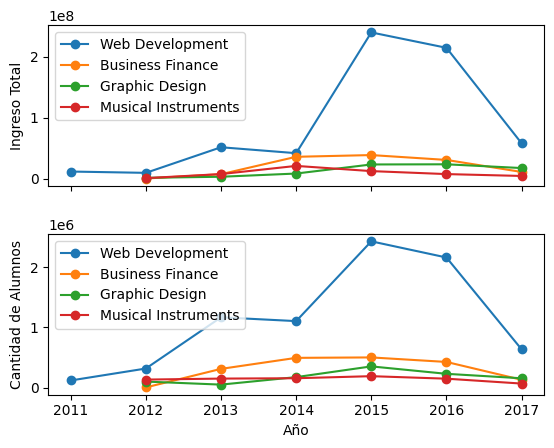

In [255]:
# Agrupamos los datos por año, género y calculamos la suma del ingreso total y la suma de la cantidad de alumnos para cada año y género
df_anual = udemy.groupby([udemy['published_timestamp'].dt.year, 'subject']).agg(
    ingreso_total=('ingreso_total', 'sum'),
    cantidad_alumnos=('num_subscribers', 'sum')
).reset_index()

# Creamos la figura y los dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Iteramos por cada género y graficamos la línea de tendencia para el ingreso total en el primer gráfico
for genero in df_anual['subject'].unique():
    datos_genero = df_anual[df_anual['subject'] == genero]
    ax1.plot(datos_genero['published_timestamp'], datos_genero['ingreso_total'], marker='o', label=genero)

ax1.set_ylabel('Ingreso Total')
ax1.legend()

# Iteraramos por cada género y graficamos la línea de tendencia para la cantidad de alumnos en el segundo gráfico
for genero in df_anual['subject'].unique():
    datos_genero = df_anual[df_anual['subject'] == genero]
    ax2.plot(datos_genero['published_timestamp'], datos_genero['cantidad_alumnos'], marker='o', label=genero)

ax2.set_xlabel('Año')
ax2.set_ylabel('Cantidad de Alumnos')
ax2.legend()

# Ajustamos los márgenes entre subplots
plt.subplots_adjust(hspace=0.3)

# Mostramos el gráfico
plt.show()

Vemos una fuerte caida que comienza en el año 2015 en el subject mas importante de la plataforma,vamos a ver su impacto en terminos generales

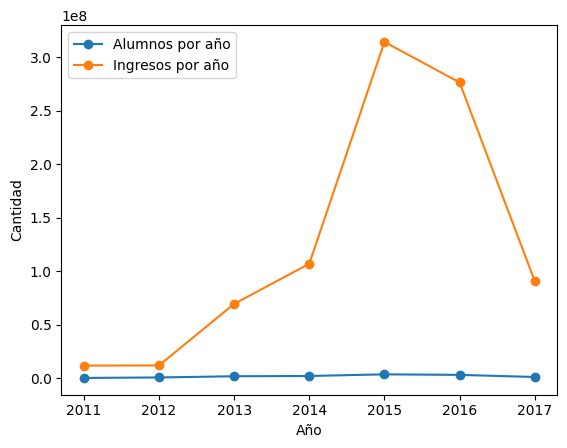

In [257]:
df_anual = udemy.groupby(udemy['published_timestamp'].dt.year).agg(
    alumnos_por_anio=('num_subscribers', 'sum'),
    ingresos_por_anio=('ingreso_total', 'sum')
)

# Crear el gráfico de líneas
fig, ax = plt.subplots()

# Graficar la línea de tendencia para la cantidad de alumnos por año
ax.plot(df_anual.index, df_anual['alumnos_por_anio'], marker='o', label='Alumnos por año')

# Graficar la línea de tendencia para los ingresos por año
ax.plot(df_anual.index, df_anual['ingresos_por_anio'], marker='o', label='Ingresos por año')

# Establecer etiquetas y leyenda
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
ax.legend()

# Mostrar el gráfico
plt.show()

In [258]:
alumnos_2016_2017 = udemy[udemy['published_timestamp'].dt.year.isin([2016, 2017])]

# Obtener los valores de la cantidad de alumnos para los años 2016 y 2017
valores_alumnos_2016_2017 = alumnos_2016_2017.groupby(udemy['published_timestamp'].dt.year)['num_subscribers'].sum()

# Imprimir los valores
print(valores_alumnos_2016_2017)

published_timestamp
2016    2966644
2017     988941
Name: num_subscribers, dtype: int64


In [259]:
caida_en_porcentaje = (2966644-988941)/2966644 * 100
caida_en_porcentaje

66.66465541534474

La caida en terminos generales es similar que la de Web development debido a que como veiamos esta era su principal fuente de alumnos e ingresos.Hubo una caida entre 2016 y 2017 del 66% de los alumnos.Esto es un problema solo de udemy ya que en ese año la cantidad de alumnos crecio en coursera.Intentamos encontrar informacion relevante pero no lo logramos,solo encontramos que en esos años Udemy cerraba una importante ronda de inversion que seria utilizada para mejorar el desempeño del negocio por lo que hubo algunas reestructuraciones.

Creamos un grafico de duracion en relacion al ingreso total

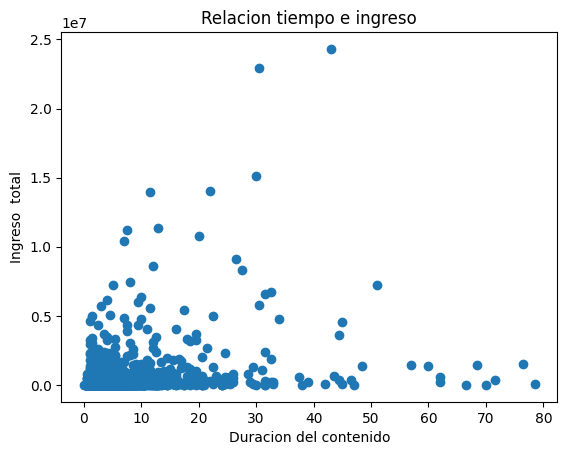

In [261]:
# Crea el diagrama de dispersión
plt.scatter(udemy["content_duration"] , udemy["ingreso_total"])

# Agrega etiquetas a los ejes
plt.xlabel('Duracion del contenido')
plt.ylabel('Ingreso  total')

# Agrega un título al gráfico
plt.title('Relacion tiempo e ingreso')

# Muestra el gráfico
plt.show()

Similar al caso de edx no hay una fuerte presencia de este factor en el ingreso total.

In [262]:
udemy.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'ingreso_total'],
      dtype='object')

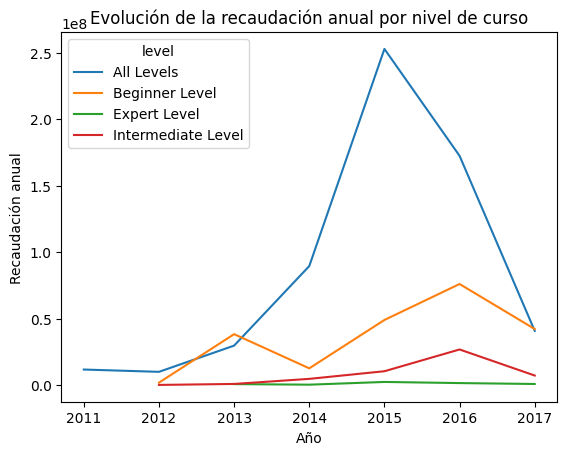

In [263]:
udemy['Año'] = udemy['published_timestamp'].dt.year

# Crear el gráfico de líneas con los datos de recaudación anual y el año
udemy.groupby(['Año', 'level'])['ingreso_total'].sum().unstack().plot(kind='line')

# Agregar etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Recaudación anual')
plt.title('Evolución de la recaudación anual por nivel de curso')

# Mostrar el gráfico
plt.show()

Vemos un comportamiento similar a los anteriores graficos.

In [272]:
alumnos_2011_2012 = udemy[udemy['published_timestamp'].dt.year.isin([2011, 2012])]

# Obtener los valores de la cantidad de alumnos para los años 2016 y 2017
valores_alumnos_2011_2012 = alumnos_2011_2012.groupby(udemy['published_timestamp'].dt.year)['num_subscribers'].sum()

# Imprimir los valores
print(valores_alumnos_2011_2012)

published_timestamp
2011    119028
2012    555339
Name: num_subscribers, dtype: int64
